MENTAL HEALTH WEARABLE DATASET OVERVIEW
Dataset Shape: (500, 13)
Total Records: 500
Total Features: 13

Column Names:
['Timestamp', 'EEG_Frequency_Bands', 'GSR_Values', 'Cognitive_State', 'Emotional_State', 'Student_ID', 'Age', 'Gender', 'Session_Type', 'Duration (minutes)', 'Environmental_Context', 'Preprocessed_Features', 'Target']

First 5 rows of the dataset:
             Timestamp                                EEG_Frequency_Bands  \
0  2025-01-01 10:00:00  [7.400574384984986, 5.621240954745124, 4.62440...   
1  2025-01-01 10:05:00  [1.6898477932146672, 7.2616994947041125, 1.106...   
2  2025-01-01 10:10:00  [0.2693319401287453, 8.909349692334239, 7.2444...   
3  2025-01-01 10:15:00  [6.080175212895389, 6.387554935291081, 9.09906...   
4  2025-01-01 10:20:00  [5.9007231710422525, 8.301537594579075, 4.4649...   

   GSR_Values     Cognitive_State Emotional_State  Student_ID  Age  Gender  \
0    1.376494          Distracted         Anxious         151   19  Female   
1    0.084319  

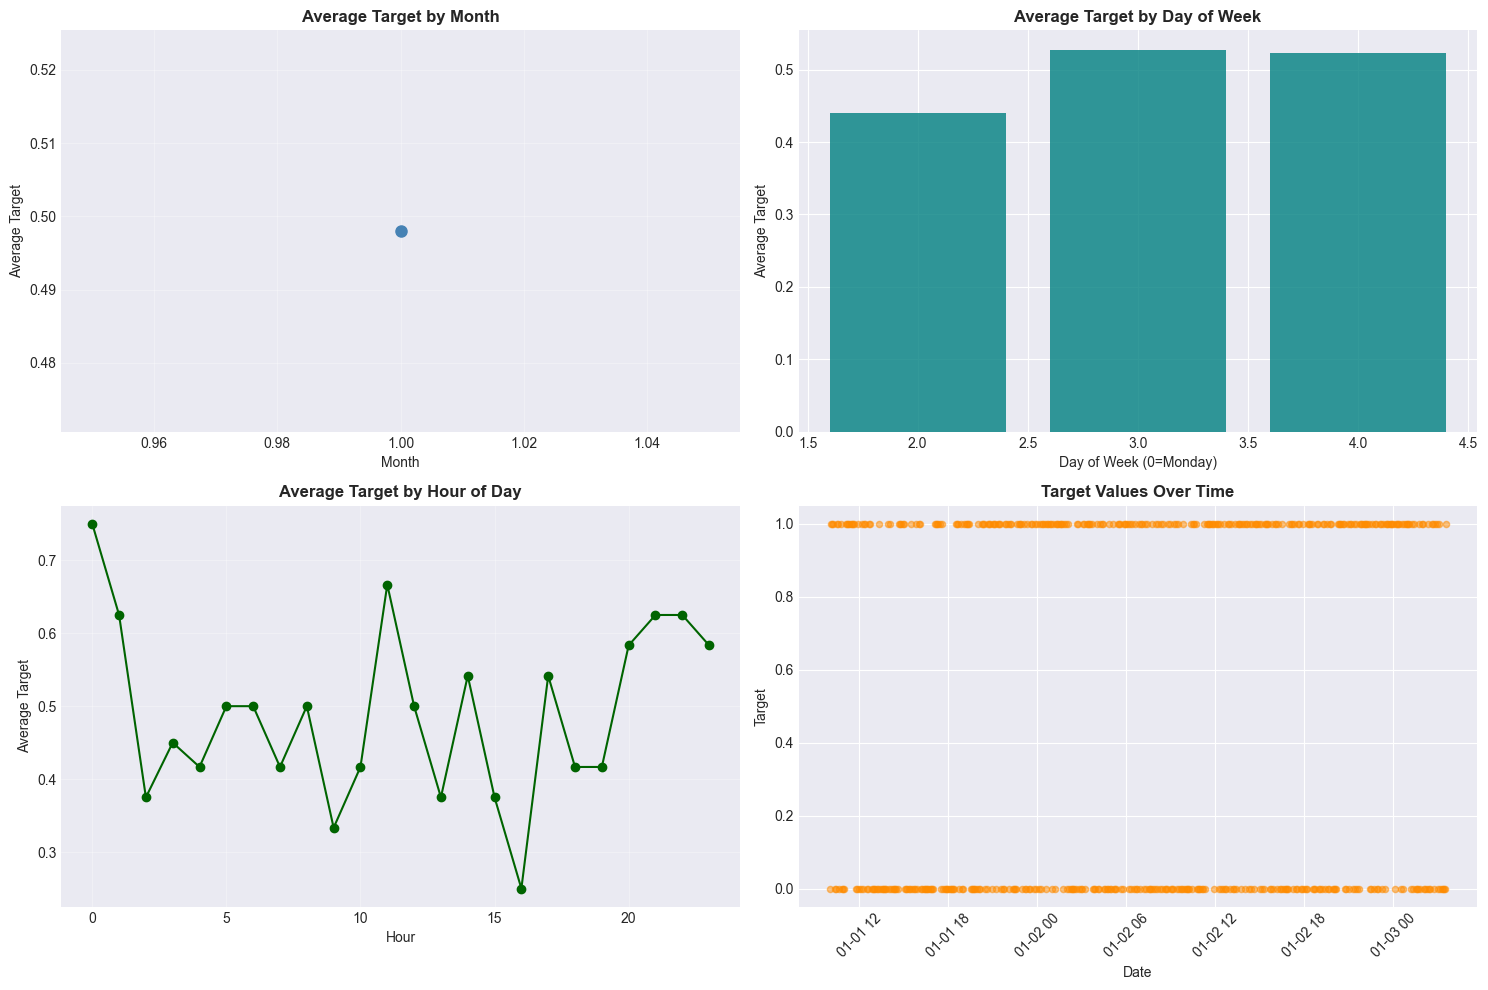


UNIVARIATE ANALYSIS - NUMERICAL FEATURES


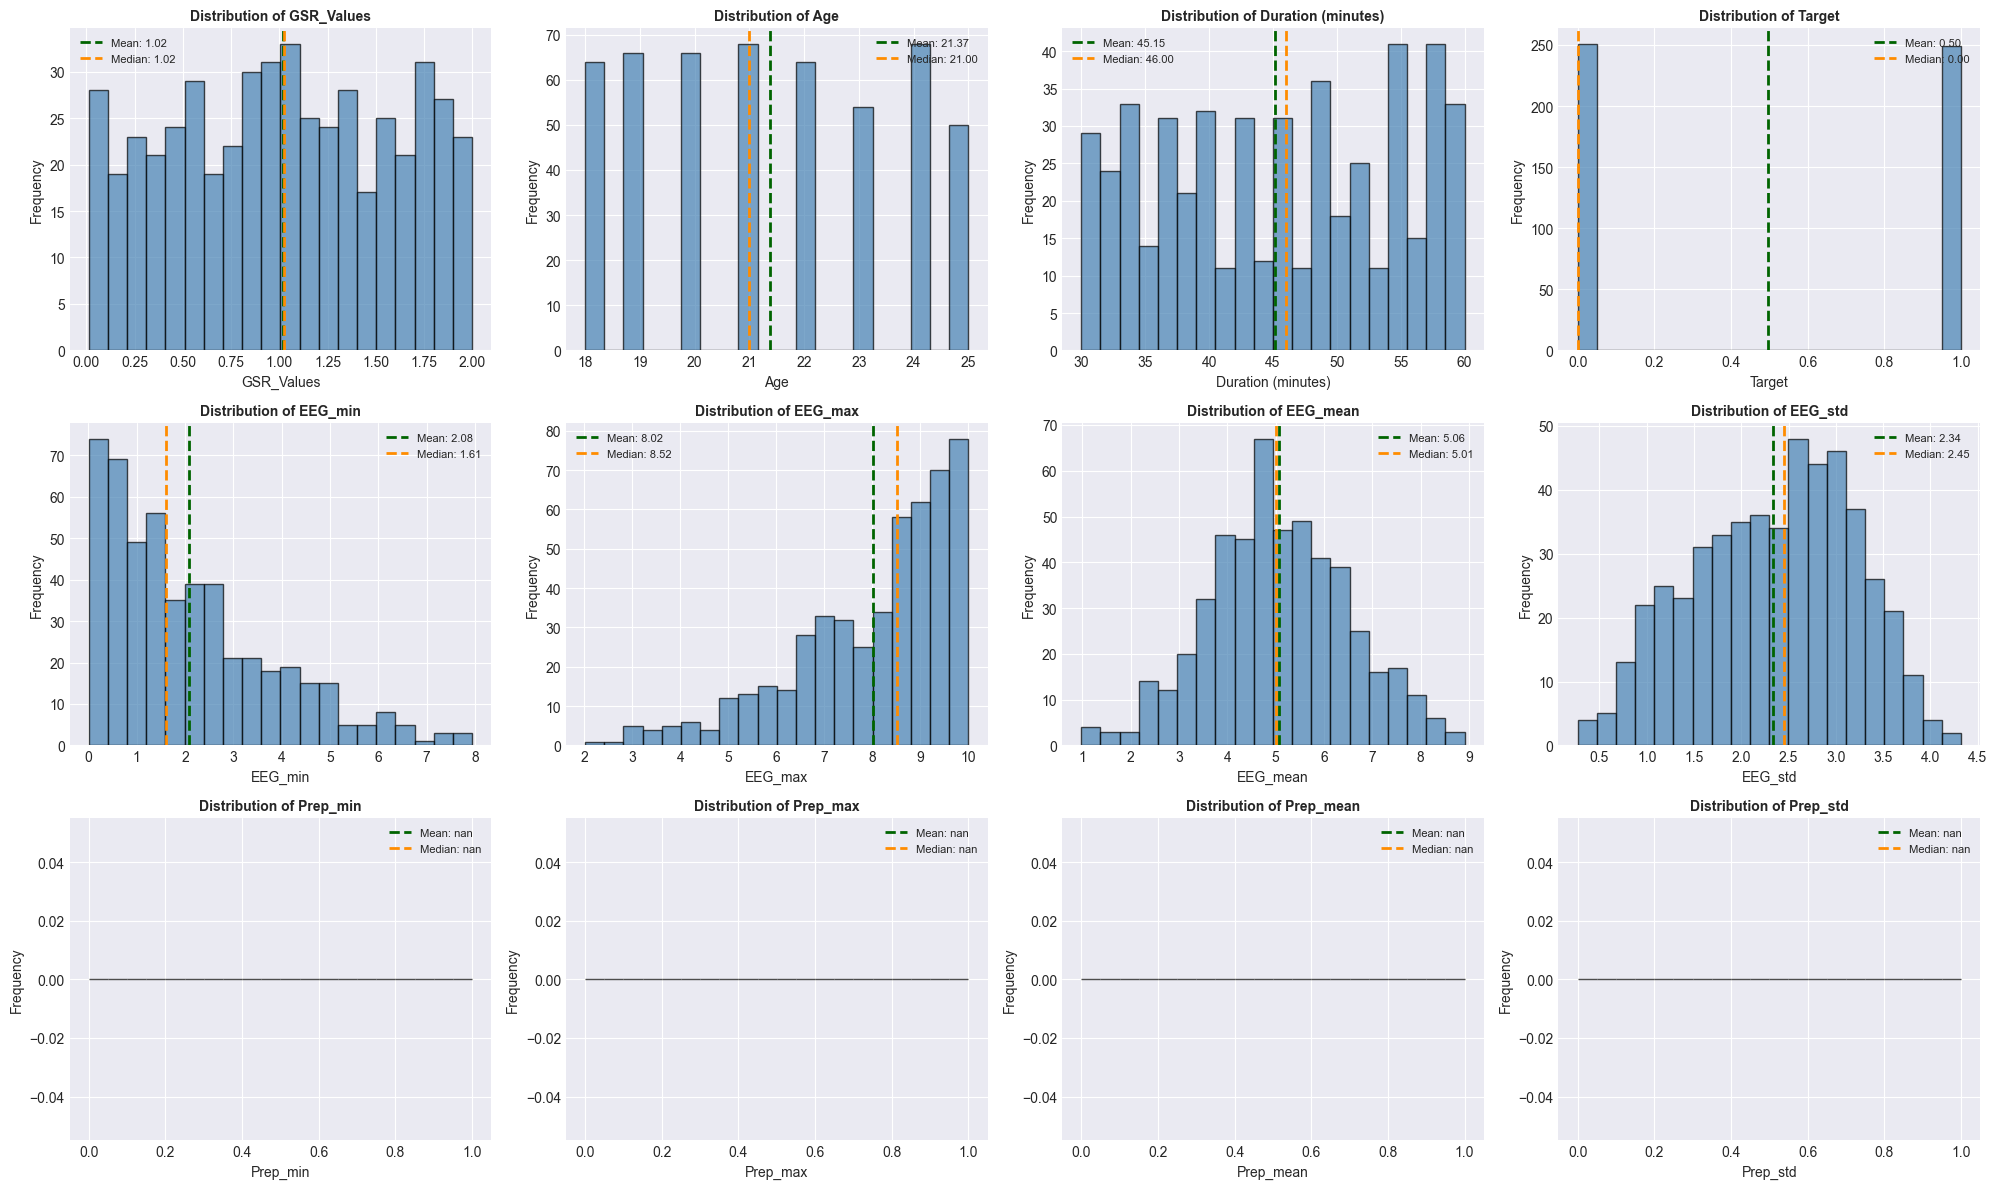


CATEGORICAL FEATURE ANALYSIS

Gender Distribution:
Gender
Female    256
Male      244
Name: count, dtype: int64

Cognitive_State Distribution:
Cognitive_State
Distracted            177
Cognitive Overload    164
Focused               159
Name: count, dtype: int64

Emotional_State Distribution:
Emotional_State
Calm        191
Anxious     168
Stressed    141
Name: count, dtype: int64

Session_Type Distribution:
Session_Type
Test          174
Study         168
Relaxation    158
Name: count, dtype: int64

Environmental_Context Distribution:
Environmental_Context
Home          178
Library       161
Quiet Room    161
Name: count, dtype: int64


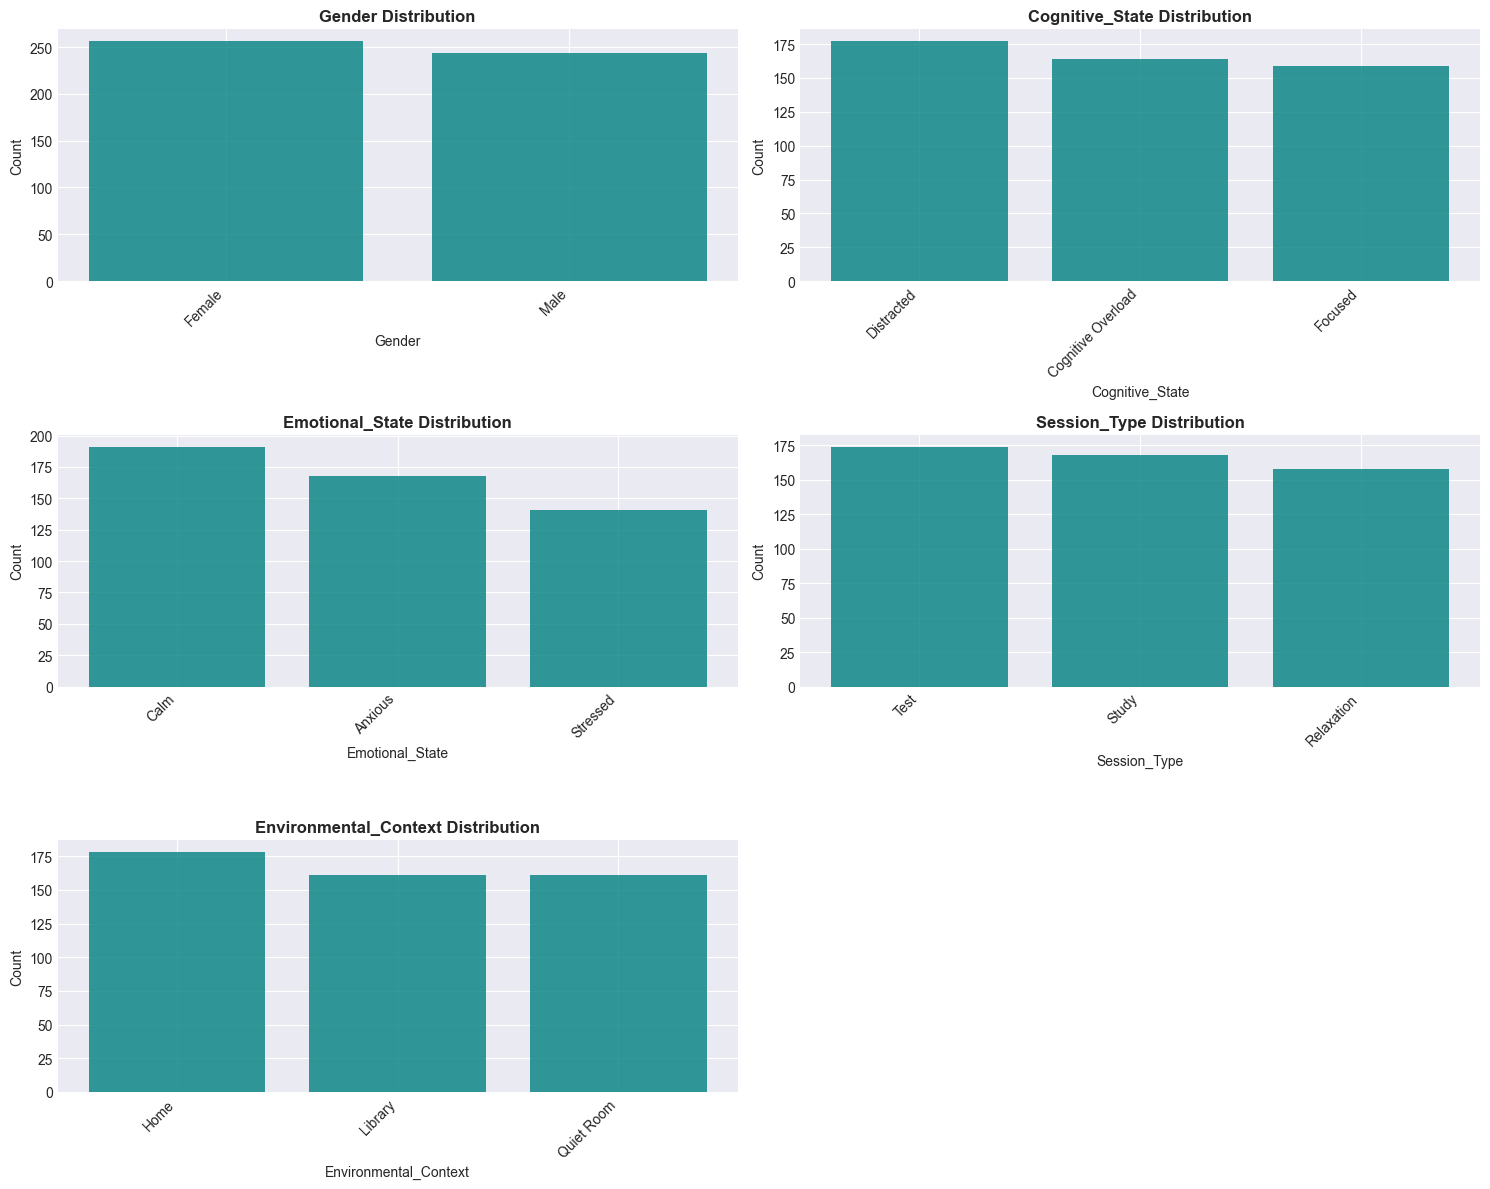


TARGET VARIABLE ANALYSIS


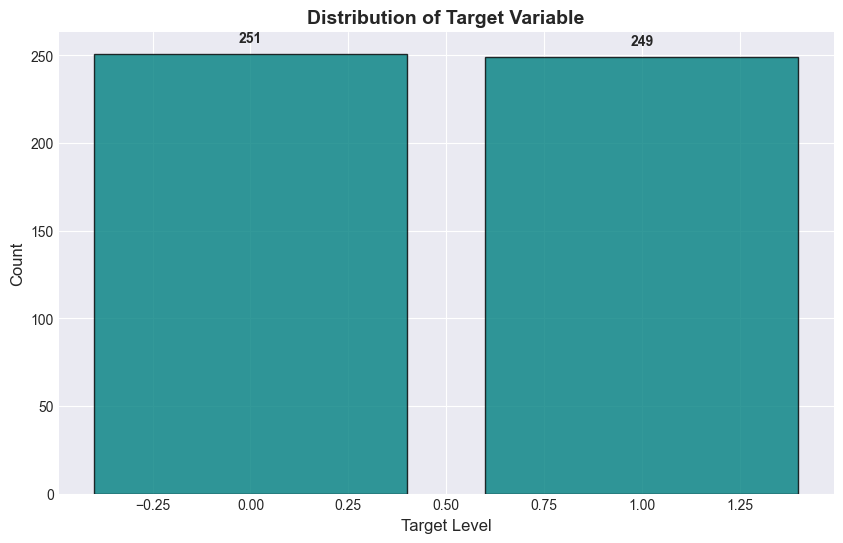


Target Value Counts:
Target
0    251
1    249
Name: count, dtype: int64

Percentage Distribution:
Target
0    50.2
1    49.8
Name: count, dtype: float64

CORRELATION ANALYSIS


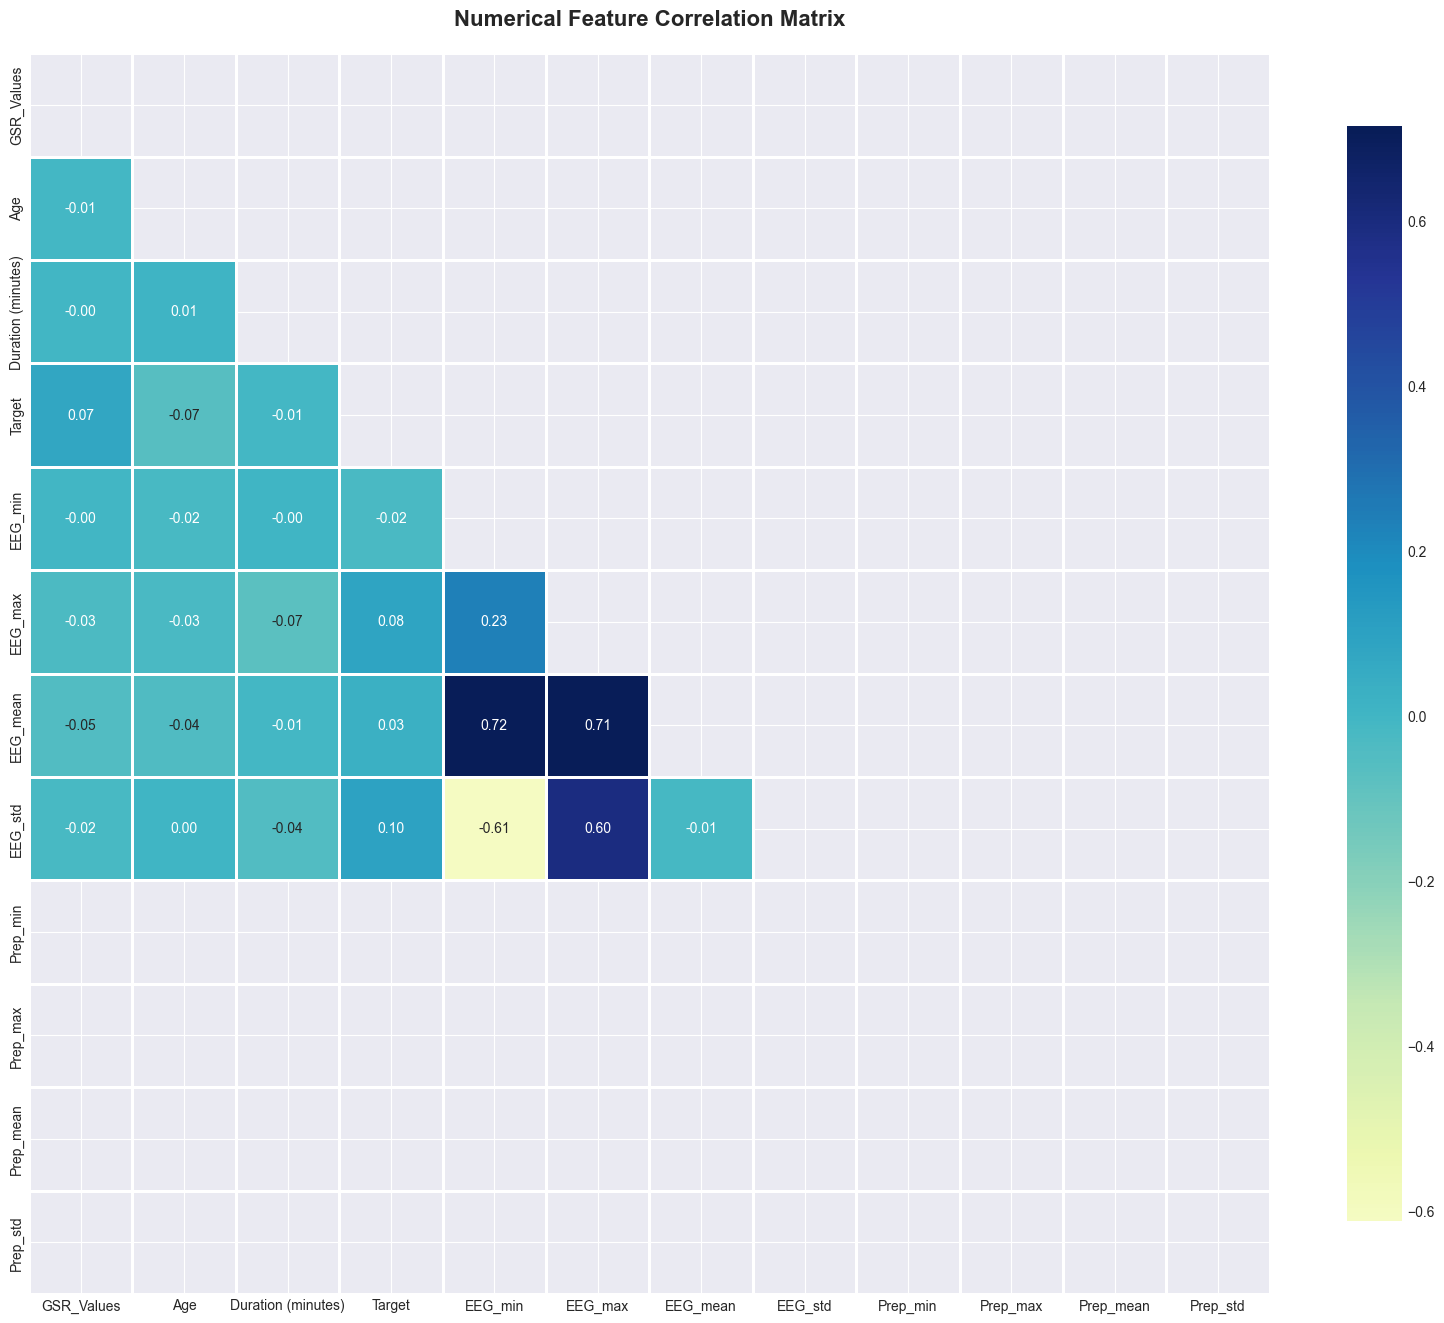


Top Features Correlated with Target:
EEG_std               0.095901
EEG_max               0.083471
GSR_Values            0.074513
EEG_mean              0.027040
Duration (minutes)   -0.007971
EEG_min              -0.023560
Age                  -0.066927
Prep_min                   NaN
Prep_max                   NaN
Prep_mean                  NaN
Name: Target, dtype: float64

Bottom Features Correlated with Target:
EEG_max               0.083471
GSR_Values            0.074513
EEG_mean              0.027040
Duration (minutes)   -0.007971
EEG_min              -0.023560
Age                  -0.066927
Prep_min                   NaN
Prep_max                   NaN
Prep_mean                  NaN
Prep_std                   NaN
Name: Target, dtype: float64


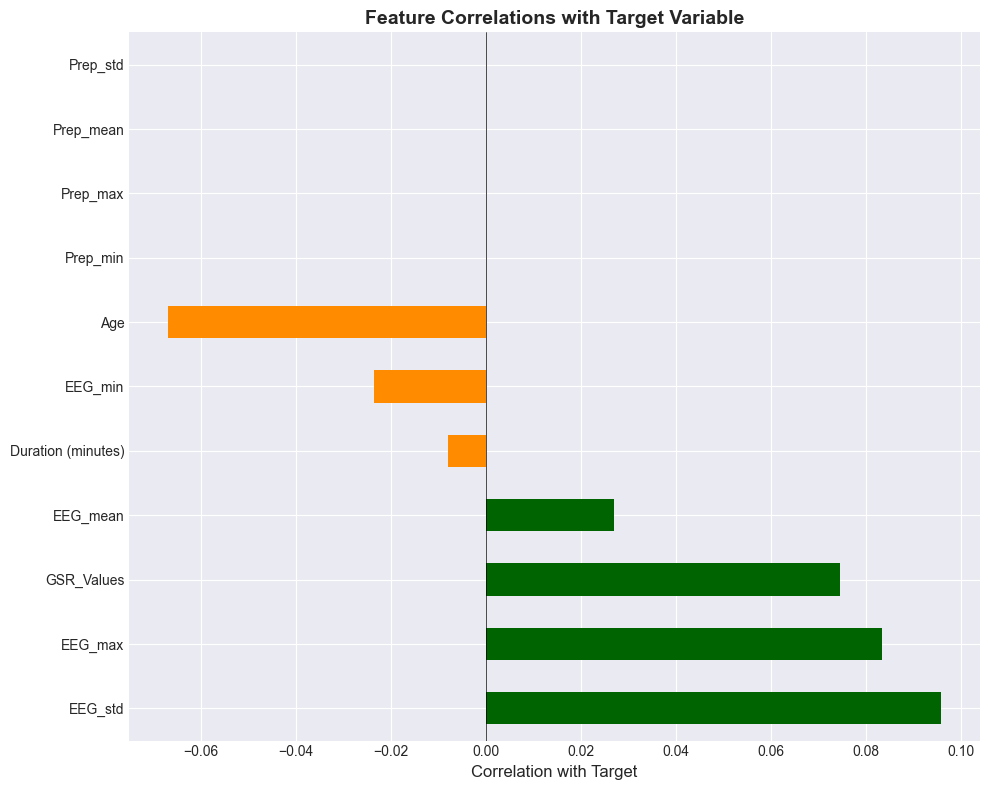


CATEGORICAL FEATURES VS TARGET ANALYSIS


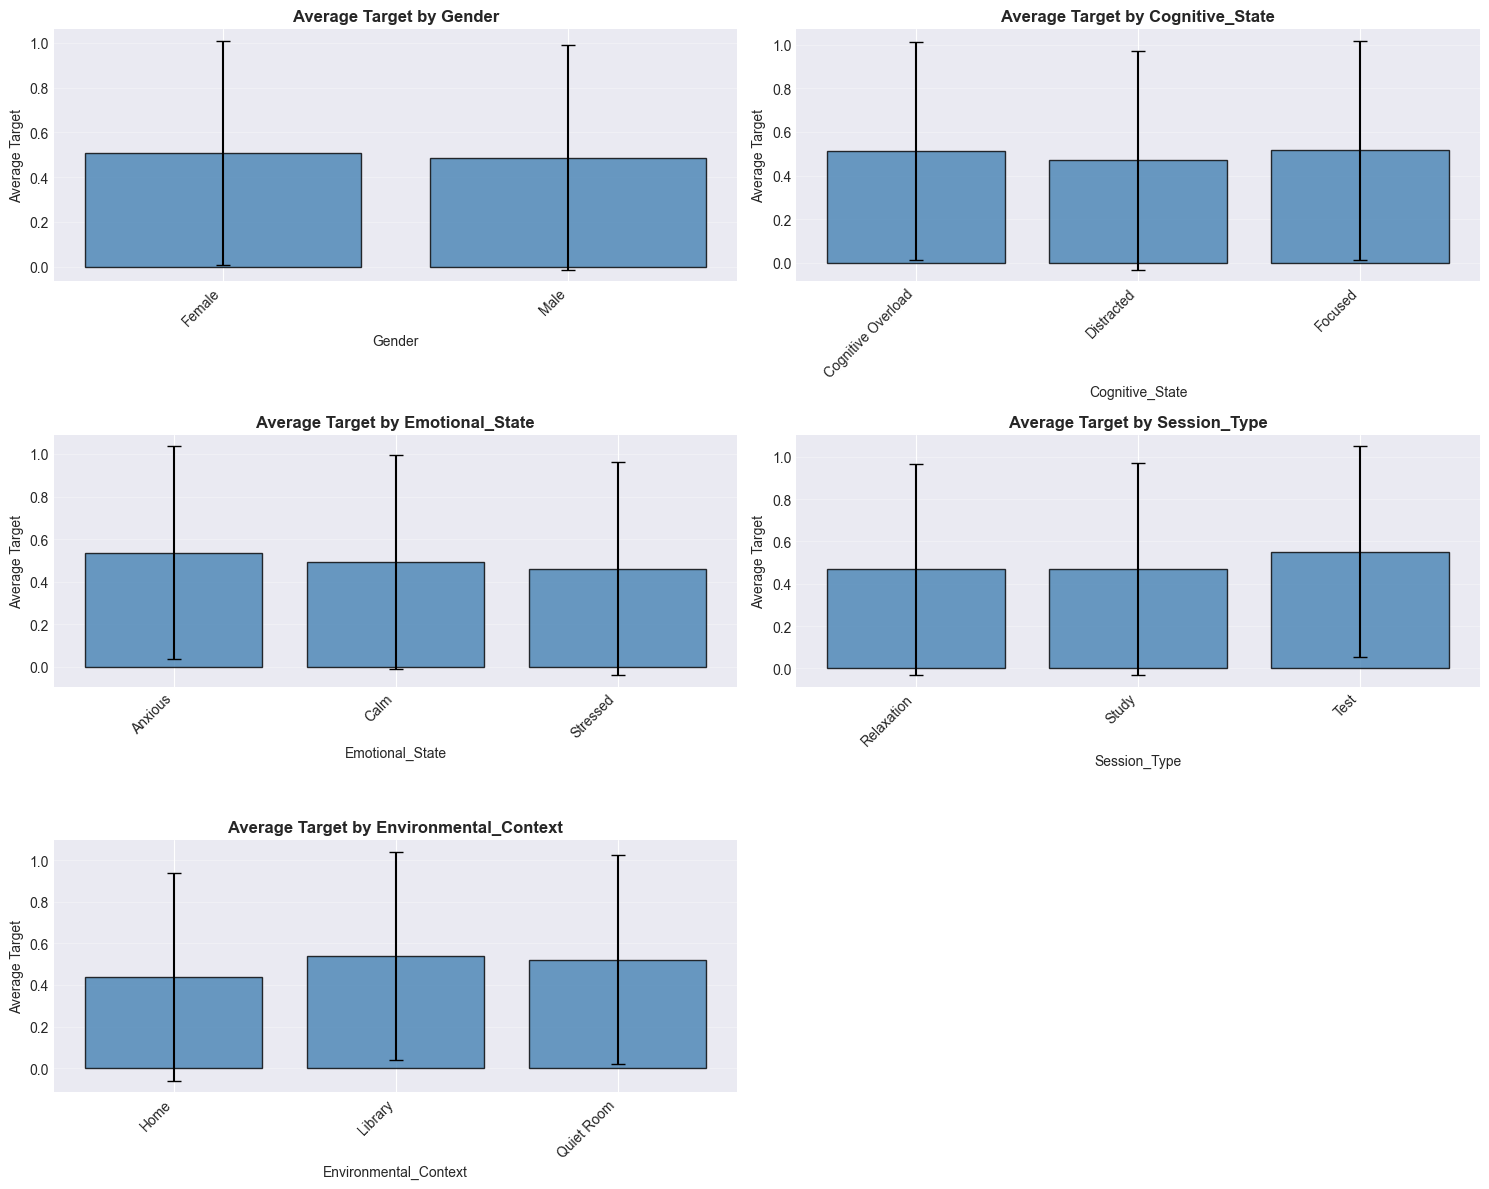


BIVARIATE ANALYSIS


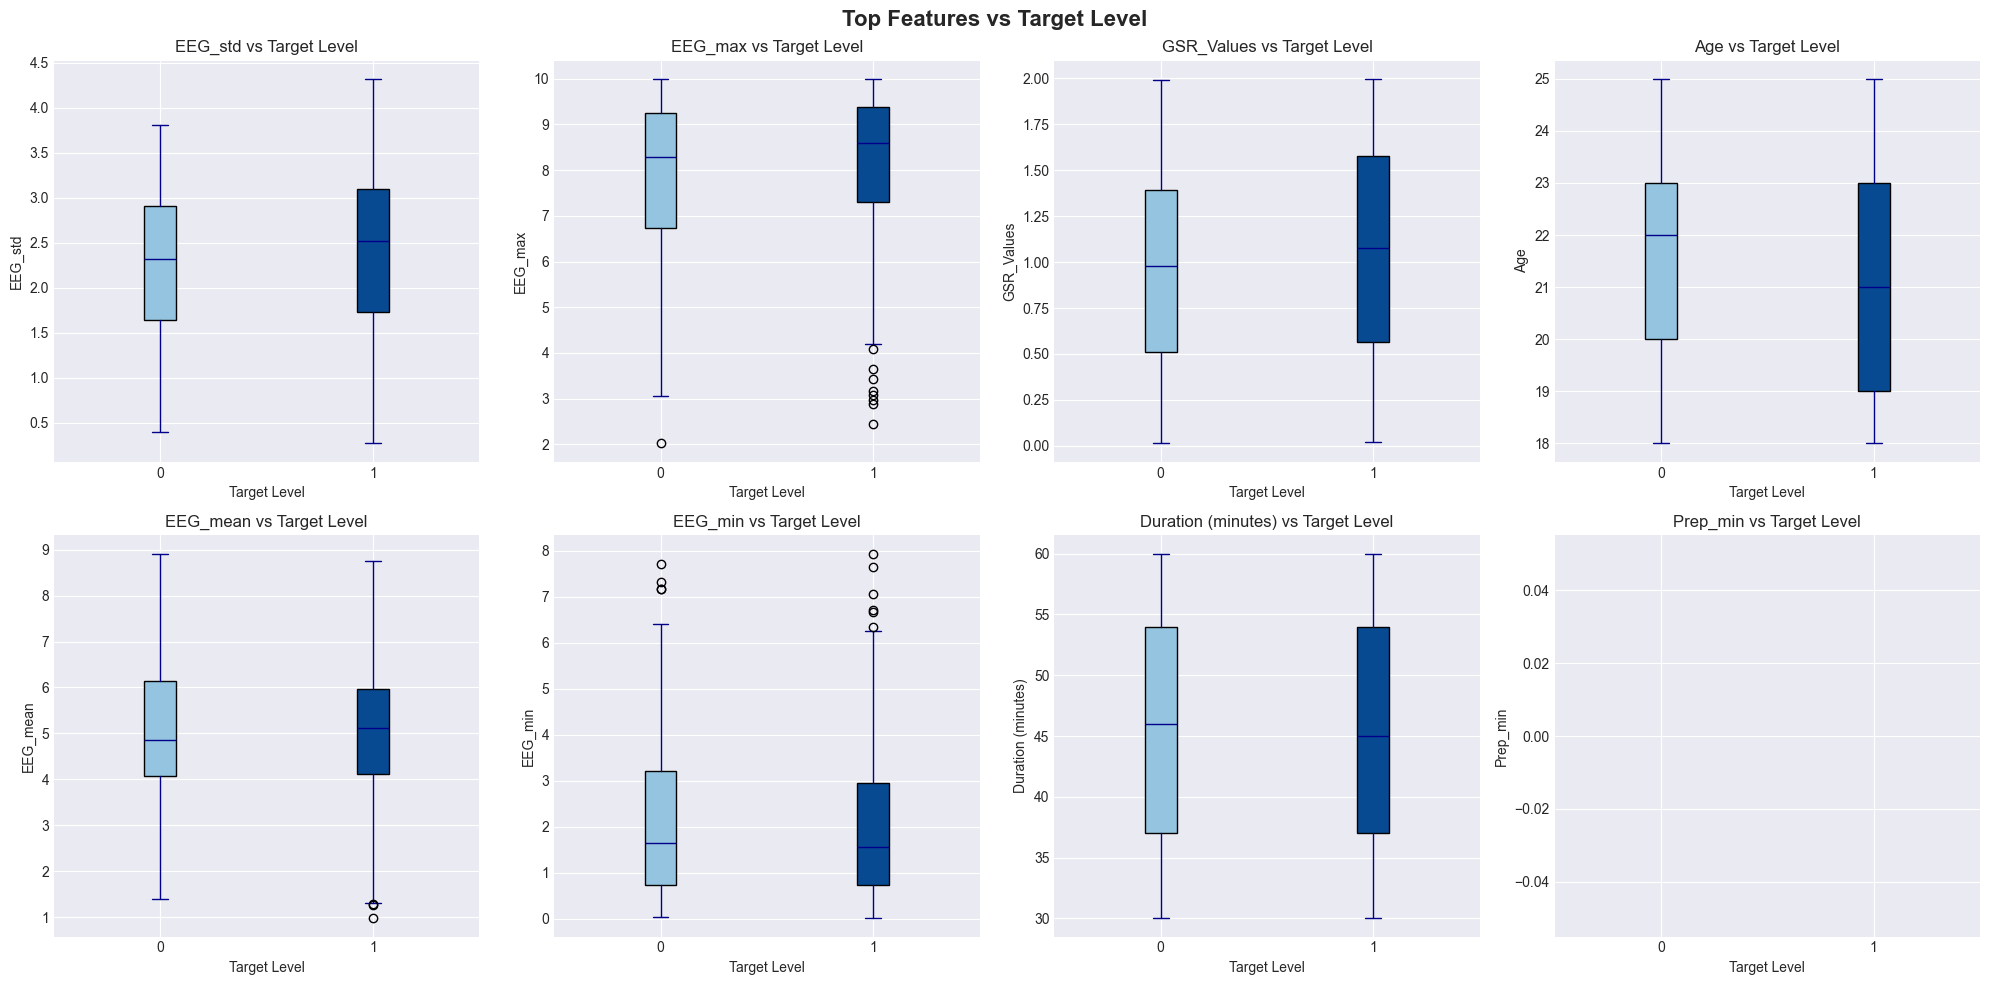


OUTLIER DETECTION

Outlier Summary (IQR Method):
          count  percentage
EEG_max    10.0         2.0
EEG_min     9.0         1.8
EEG_mean    1.0         0.2


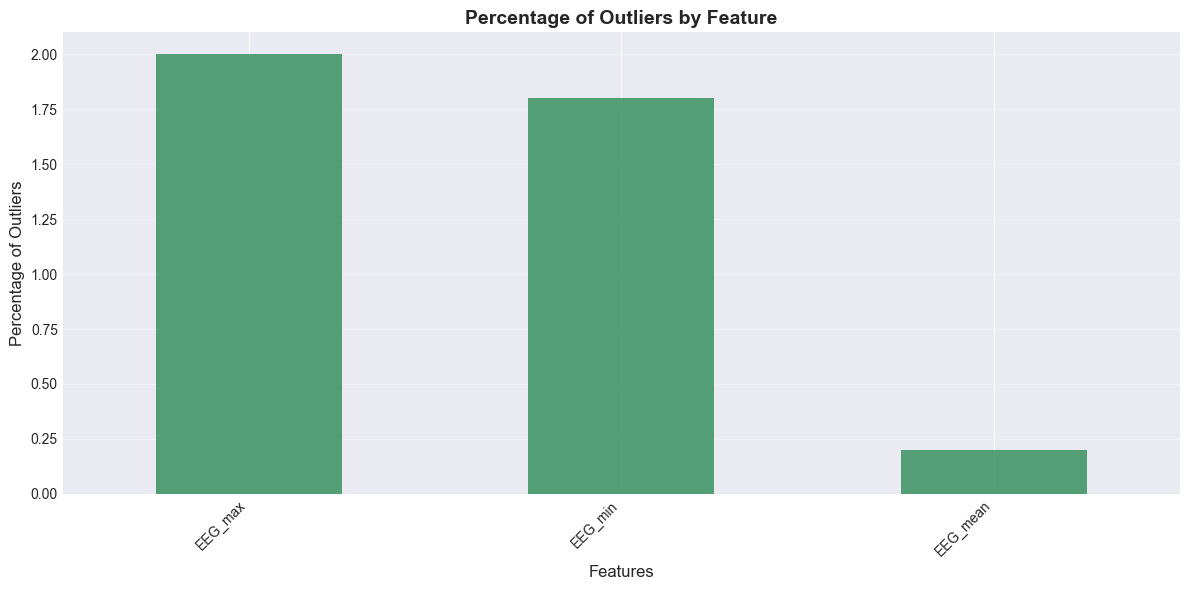


FEATURE IMPORTANCE ANALYSIS

Mutual Information Scores:
                    Feature  MI Score
3                    Target  0.694140
5                   EEG_max  0.053067
13  Cognitive_State_encoded  0.026404
7                   EEG_std  0.018502
6                  EEG_mean  0.016074
11                 Prep_std  0.010177
8                  Prep_min  0.001160
10                Prep_mean  0.000797
0                GSR_Values  0.000000
2        Duration (minutes)  0.000000
1                       Age  0.000000
4                   EEG_min  0.000000
9                  Prep_max  0.000000
12           Gender_encoded  0.000000
14  Emotional_State_encoded  0.000000


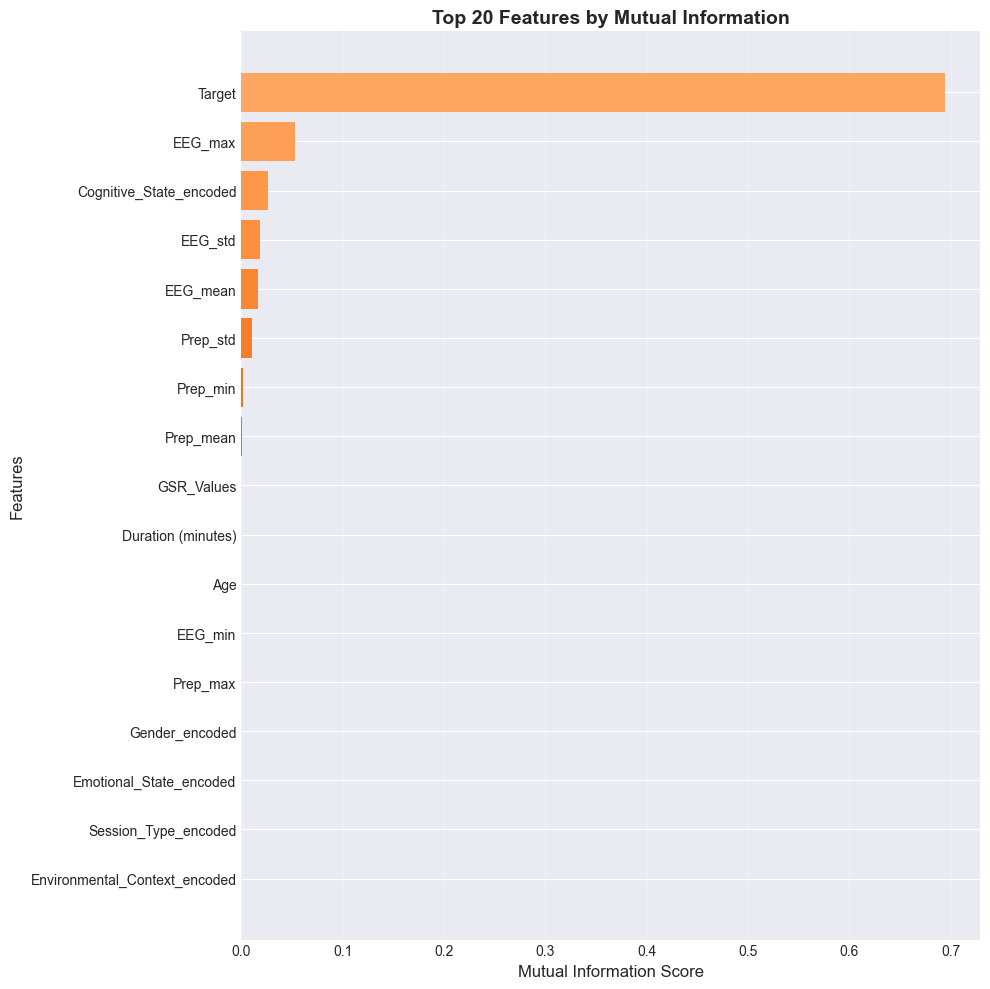


DIMENSIONALITY REDUCTION (PCA)


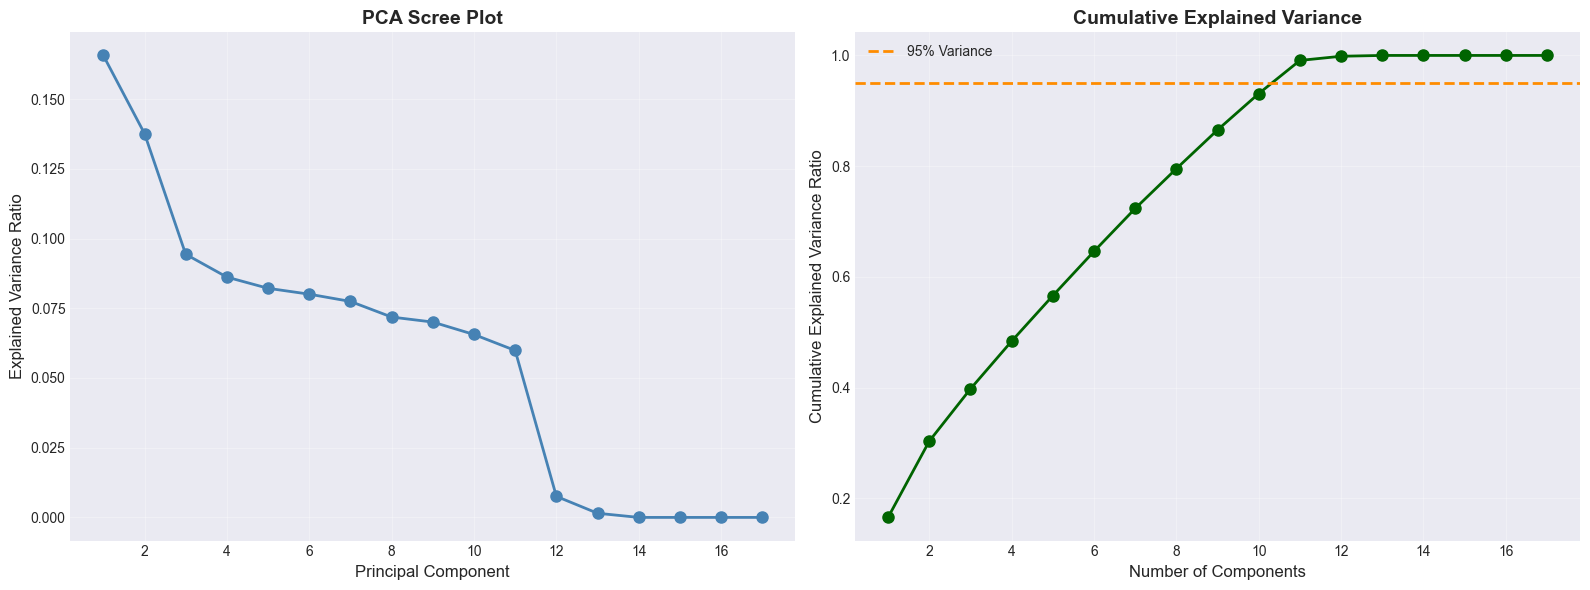


Number of components needed for 95% variance: 11

STATISTICAL TESTS

Normality Test for Target Variable:
Statistic: 2069.9954
P-value: 0.0000
Is normally distributed? No

Chi-Square Tests (Categorical Features vs Target):

Gender:
  Chi-square statistic: 0.1296
  P-value: 0.7188
  Degrees of freedom: 1
  Significant association? No

Cognitive_State:
  Chi-square statistic: 0.9304
  P-value: 0.6280
  Degrees of freedom: 2
  Significant association? No

Emotional_State:
  Chi-square statistic: 1.7544
  P-value: 0.4159
  Degrees of freedom: 2
  Significant association? No

Session_Type:
  Chi-square statistic: 3.0823
  P-value: 0.2141
  Degrees of freedom: 2
  Significant association? No

Environmental_Context:
  Chi-square statistic: 4.0652
  P-value: 0.1310
  Degrees of freedom: 2
  Significant association? No

ANOVA Tests (Numerical Features by Target level):

GSR_Values:
  F-statistic: 2.7804
  P-value: 0.0961
  Significant difference? No

EEG_mean:
  F-statistic: 0.3644
  P-value: 0

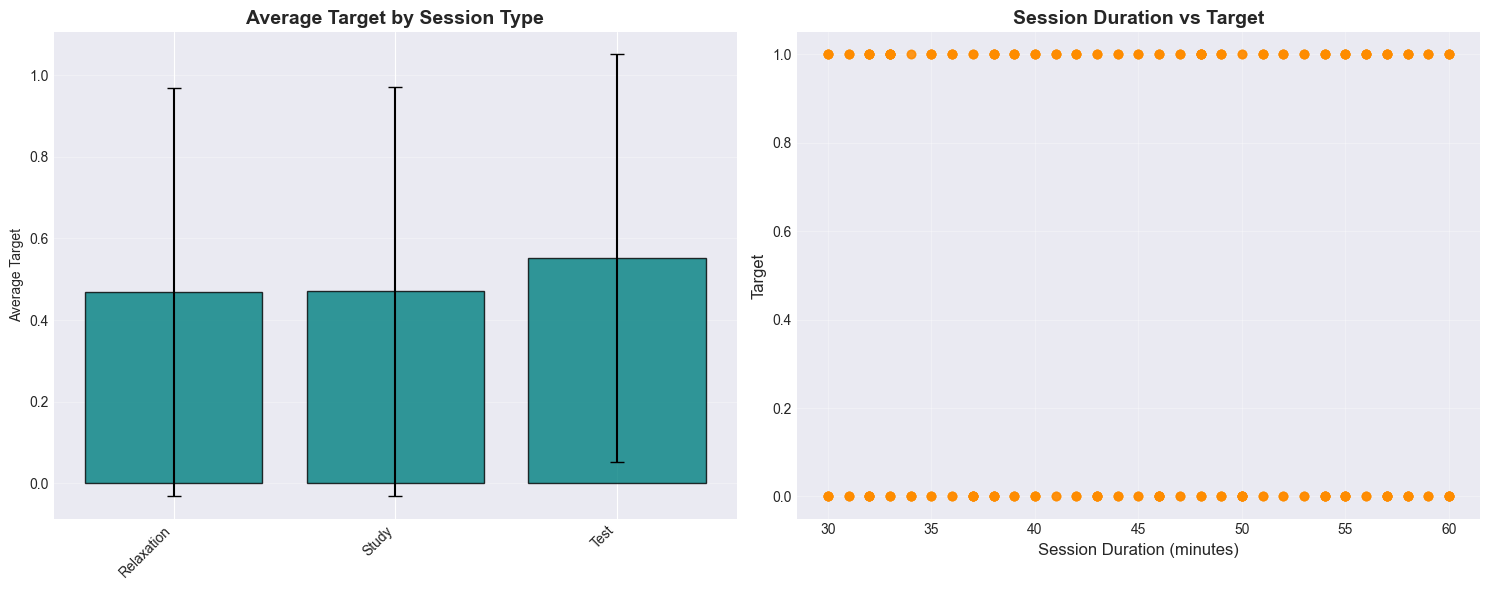


RECOMMENDATIONS FOR ML PREPROCESSING

1. FEATURE ENGINEERING:
   - Extract features from range values (DONE: min, max, mean, std)
   - Consider creating interaction features between EEG and GSR
   - Time-based features: hour of day, day of week effects
   - Student-specific features: average performance, variance

2. HANDLING CATEGORICAL VARIABLES:
   - One-hot encoding for nominal categories (Gender, Environmental_Context)
   - Ordinal encoding for ordered categories if any
   - Target encoding for high-cardinality features

3. FEATURE SCALING:
   - StandardScaler recommended for neural networks and SVM
   - MinMaxScaler for algorithms requiring bounded inputs
   - Robust scaling for features with outliers

4. HANDLING CLASS IMBALANCE:
   - Classes are reasonably balanced

5. TEMPORAL CONSIDERATIONS:
   - Use time-based split for validation (not random split)
   - Consider student-based grouping for cross-validation
   - Account for temporal patterns in model selection

6. FEATURE SE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
df = pd.read_csv('data/mental_health_wearable_data.csv')

print("=" * 80)
print("MENTAL HEALTH WEARABLE DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display data types
print("\nData Types:")
print(df.dtypes)

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Identify categorical vs numerical columns
categorical_cols = ['Gender', 'Cognitive_State', 'Emotional_State', 'Session_Type', 'Environmental_Context']
numerical_cols = ['GSR_Values', 'Age', 'Duration (minutes)', 'Target']
range_cols = ['EEG_Frequency_Bands', 'Preprocessed_Features']

print("\nColumn Classification:")
print(f"Categorical: {categorical_cols}")
print(f"Numerical: {numerical_cols}")
print(f"Range/Multi-value: {range_cols}")

# Basic statistics for numerical columns
print("\nBasic Statistics (Numerical Features):")
print(df[numerical_cols].describe())

# =============================================================================
# 3. HANDLING RANGE VALUES AND FEATURE EXTRACTION
# =============================================================================

print("\n" + "=" * 80)
print("PROCESSING RANGE VALUES")
print("=" * 80)

# Function to extract statistics from range values
def extract_range_stats(value_str):
    """Extract min, max, mean from range values like '[1.2, 3.4, 5.6]'"""
    try:
        # Remove brackets and split by comma
        values = value_str.strip('[]').split(',')
        values = [float(v.strip()) for v in values]
        return {
            'min': min(values),
            'max': max(values),
            'mean': np.mean(values),
            'std': np.std(values) if len(values) > 1 else 0
        }
    except:
        return {'min': np.nan, 'max': np.nan, 'mean': np.nan, 'std': np.nan}

# Process EEG_Frequency_Bands
print("\nProcessing EEG_Frequency_Bands...")
eeg_stats = df['EEG_Frequency_Bands'].apply(extract_range_stats)
df['EEG_min'] = [d['min'] for d in eeg_stats]
df['EEG_max'] = [d['max'] for d in eeg_stats]
df['EEG_mean'] = [d['mean'] for d in eeg_stats]
df['EEG_std'] = [d['std'] for d in eeg_stats]

# Process Preprocessed_Features
print("Processing Preprocessed_Features...")
prep_stats = df['Preprocessed_Features'].apply(extract_range_stats)
df['Prep_min'] = [d['min'] for d in prep_stats]
df['Prep_max'] = [d['max'] for d in prep_stats]
df['Prep_mean'] = [d['mean'] for d in prep_stats]
df['Prep_std'] = [d['std'] for d in prep_stats]

# Update numerical columns list
new_numerical_cols = numerical_cols + ['EEG_min', 'EEG_max', 'EEG_mean', 'EEG_std',
                                       'Prep_min', 'Prep_max', 'Prep_mean', 'Prep_std']

print(f"\nNew numerical features created: {len(new_numerical_cols) - len(numerical_cols)}")

# =============================================================================
# 4. TEMPORAL ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TEMPORAL ANALYSIS")
print("=" * 80)

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

# Temporal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly distribution
monthly_counts = df.groupby('Month')['Target'].mean()
axes[0, 0].plot(monthly_counts.index, monthly_counts.values, 'o-', color='steelblue', markersize=8)
axes[0, 0].set_title('Average Target by Month', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Target')
axes[0, 0].grid(True, alpha=0.3)

# Day of week distribution
dow_counts = df.groupby('DayOfWeek')['Target'].mean()
axes[0, 1].bar(dow_counts.index, dow_counts.values, color='teal', alpha=0.8)
axes[0, 1].set_title('Average Target by Day of Week', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week (0=Monday)')
axes[0, 1].set_ylabel('Average Target')

# Hourly distribution
hourly_counts = df.groupby('Hour')['Target'].mean()
axes[1, 0].plot(hourly_counts.index, hourly_counts.values, 'o-', color='darkgreen', markersize=6)
axes[1, 0].set_title('Average Target by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Average Target')
axes[1, 0].grid(True, alpha=0.3)

# Target trend over time
axes[1, 1].scatter(df['Timestamp'], df['Target'], alpha=0.5, color='darkorange', s=20)
axes[1, 1].set_title('Target Values Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Target')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. UNIVARIATE ANALYSIS - NUMERICAL FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("=" * 80)

# Create subplots for numerical features
n_features = len(new_numerical_cols)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.ravel()

for idx, col in enumerate(new_numerical_cols):
    if idx < len(axes):
        # Use different shades of blue for histograms
        axes[idx].hist(df[col].dropna(), bins=20, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend(fontsize=8)

# Hide empty subplots
for idx in range(len(new_numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. CATEGORICAL FEATURE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CATEGORICAL FEATURE ANALYSIS")
print("=" * 80)

# Analyze categorical features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Value counts
    value_counts = df[col].value_counts()
    print(f"\n{col} Distribution:")
    print(value_counts)
    
    # Plot
    if len(value_counts) <= 10:  # Bar plot for few categories
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='teal', alpha=0.8)
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    else:  # Horizontal bar for many categories
        axes[idx].barh(range(len(value_counts.head(10))), value_counts.head(10).values, color='teal', alpha=0.8)
        axes[idx].set_yticks(range(len(value_counts.head(10))))
        axes[idx].set_yticklabels(value_counts.head(10).index)
    
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Count' if len(value_counts) > 10 else col)
    axes[idx].set_ylabel(col if len(value_counts) > 10 else 'Count')

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 7. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

# Target distribution
plt.figure(figsize=(10, 6))
target_counts = df['Target'].value_counts().sort_index()
bars = plt.bar(target_counts.index, target_counts.values, edgecolor='black', color='teal', alpha=0.8)
plt.xlabel('Target Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
# Add value labels on bars
for i, v in enumerate(target_counts.values):
    plt.text(target_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTarget Value Counts:")
print(target_counts)
print(f"\nPercentage Distribution:")
print((target_counts / len(df) * 100).round(2))

# =============================================================================
# 8. CORRELATION ANALYSIS (NUMERICAL FEATURES)
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Compute correlation matrix for numerical features
correlation_matrix = df[new_numerical_cols].corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='YlGnBu', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Numerical Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with Target
target_correlations = correlation_matrix['Target'].drop('Target').sort_values(ascending=False)
print("\nTop Features Correlated with Target:")
print(target_correlations.head(10))
print("\nBottom Features Correlated with Target:")
print(target_correlations.tail(10))

# Visualize correlations with Target
plt.figure(figsize=(10, 8))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Target', fontsize=12)
plt.title('Feature Correlations with Target Variable', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 9. CATEGORICAL VS TARGET ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CATEGORICAL FEATURES VS TARGET ANALYSIS")
print("=" * 80)

# Analyze relationship between categorical features and target
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Group by categorical feature and calculate mean target
    grouped = df.groupby(col)['Target'].agg(['mean', 'std', 'count'])
    
    # Plot only top 10 categories if too many
    if len(grouped) > 10:
        grouped = grouped.nlargest(10, 'count')
    
    # Create bar plot with error bars
    x_pos = np.arange(len(grouped))
    axes[idx].bar(x_pos, grouped['mean'], yerr=grouped['std'], capsize=5, 
                  color='steelblue', alpha=0.8, edgecolor='black')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(grouped.index, rotation=45, ha='right')
    axes[idx].set_title(f'Average Target by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Average Target')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('categorical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 10. BIVARIATE ANALYSIS - TOP NUMERICAL FEATURES VS TARGET
# =============================================================================

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Select top features based on correlation
top_features = target_correlations.abs().nlargest(8).index.tolist()

# Create box plots for top features vs target level
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Group data by target level for the current feature
    data_to_plot = [df[df['Target'] == level][feature].dropna().values 
                    for level in sorted(df['Target'].unique())]
    
    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)
    
    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')
    
    axes[idx].set_title(f'{feature} vs Target Level', fontsize=12)
    axes[idx].set_xlabel('Target Level')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(sorted(df['Target'].unique()))

plt.suptitle('Top Features vs Target Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_vs_target_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 11. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method for numerical features
outlier_summary = {}
for col in new_numerical_cols:
    if df[col].notna().sum() > 0:  # Check if column has valid values
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100
        }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outliers
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    plt.figure(figsize=(12, 6))
    outlier_df[outlier_df['count'] > 0]['percentage'].plot(kind='bar', color='seagreen', alpha=0.8)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Outliers', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 12. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Prepare data for feature importance
# Encode categorical variables
le_dict = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df[col])
    le_dict[col] = le

# Combine numerical and encoded categorical features
feature_cols = new_numerical_cols + [col + '_encoded' for col in categorical_cols]
X = df_encoded[feature_cols].fillna(0)  # Fill NaN with 0 for analysis
y = df_encoded['Target']

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': feature_cols,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df.head(15))

# Visualize mutual information scores
plt.figure(figsize=(10, 10))
# Create gradient colors from orange to dark orange
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
plt.barh(mi_scores_df['Feature'][:20], mi_scores_df['MI Score'][:20], color=colors[:20])
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Features by Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mutual_information_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 13. DIMENSIONALITY REDUCTION VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
ax1.plot(range(1, min(21, len(explained_variance_ratio) + 1)), 
         explained_variance_ratio[:20], 'o-', 
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', 
         color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# =============================================================================
# 14. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of Target
statistic, p_value = stats.normaltest(df['Target'])
print(f"\nNormality Test for Target Variable:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Is normally distributed? {'Yes' if p_value > 0.05 else 'No'}")

# Chi-square tests for categorical features vs Target
print("\nChi-Square Tests (Categorical Features vs Target):")
for feature in categorical_cols:
    contingency_table = pd.crosstab(df[feature], df['Target'])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\n{feature}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_val:.4f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Significant association? {'Yes' if p_val < 0.05 else 'No'}")

# ANOVA test for numerical features vs Target
print("\nANOVA Tests (Numerical Features by Target level):")
for feature in ['GSR_Values', 'EEG_mean', 'Duration (minutes)']:
    groups = [group[feature].dropna().values for name, group in df.groupby('Target')]
    if all(len(g) > 0 for g in groups):  # Check all groups have data
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"\n{feature}:")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value: {p_val:.4f}")
        print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}")

# =============================================================================
# 15. SESSION AND STUDENT ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("SESSION AND STUDENT ANALYSIS")
print("=" * 80)

# Sessions per student
sessions_per_student = df.groupby('Student_ID').size()
print(f"\nNumber of unique students: {df['Student_ID'].nunique()}")
print(f"Average sessions per student: {sessions_per_student.mean():.2f}")
print(f"Min sessions: {sessions_per_student.min()}")
print(f"Max sessions: {sessions_per_student.max()}")

# Target variation by session type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Session type analysis
session_target = df.groupby('Session_Type')['Target'].agg(['mean', 'std', 'count'])
x_pos = np.arange(len(session_target))
ax1.bar(x_pos, session_target['mean'], yerr=session_target['std'], 
        capsize=5, color='teal', alpha=0.8, edgecolor='black')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(session_target.index, rotation=45, ha='right')
ax1.set_title('Average Target by Session Type', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Target')
ax1.grid(axis='y', alpha=0.3)

# Duration vs Target scatter
ax2.scatter(df['Duration (minutes)'], df['Target'], alpha=0.5, color='darkorange')
ax2.set_xlabel('Session Duration (minutes)', fontsize=12)
ax2.set_ylabel('Target', fontsize=12)
ax2.set_title('Session Duration vs Target', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('session_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 16. DATA PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR ML PREPROCESSING")
print("=" * 80)

print("\n1. FEATURE ENGINEERING:")
print("   - Extract features from range values (DONE: min, max, mean, std)")
print("   - Consider creating interaction features between EEG and GSR")
print("   - Time-based features: hour of day, day of week effects")
print("   - Student-specific features: average performance, variance")

print("\n2. HANDLING CATEGORICAL VARIABLES:")
print("   - One-hot encoding for nominal categories (Gender, Environmental_Context)")
print("   - Ordinal encoding for ordered categories if any")
print("   - Target encoding for high-cardinality features")

print("\n3. FEATURE SCALING:")
print("   - StandardScaler recommended for neural networks and SVM")
print("   - MinMaxScaler for algorithms requiring bounded inputs")
print("   - Robust scaling for features with outliers")

print("\n4. HANDLING CLASS IMBALANCE:")
target_dist = df['Target'].value_counts(normalize=True)
if target_dist.min() < 0.1:
    print("   - Consider using SMOTE or class weights")
    print(f"   - Minority class represents {target_dist.min()*100:.1f}% of data")
else:
    print("   - Classes are reasonably balanced")

print("\n5. TEMPORAL CONSIDERATIONS:")
print("   - Use time-based split for validation (not random split)")
print("   - Consider student-based grouping for cross-validation")
print("   - Account for temporal patterns in model selection")

print("\n6. FEATURE SELECTION:")
print("   - Use mutual information scores for initial selection")
print(f"   - Top features: {mi_scores_df.head(10)['Feature'].tolist()}")
print("   - Consider removing highly correlated features")

print("\n7. MISSING DATA STRATEGY:")
print("   - No missing values in raw data")
print("   - Handle NaN from range value extraction appropriately")

# =============================================================================
# 17. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report
summary_report = f"""
MENTAL HEALTH WEARABLE DATASET ANALYSIS SUMMARY
==============================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]} (original) + {len(new_numerical_cols) - len(numerical_cols)} (engineered)
- Unique Students: {df['Student_ID'].nunique()}
- Time Period: {df['Timestamp'].min()} to {df['Timestamp'].max()}

Target Variable Distribution:
{target_counts.to_dict()}

Feature Types:
- Numerical: {len(numerical_cols)}
- Categorical: {len(categorical_cols)}
- Range/Multi-value: {len(range_cols)}

Top 5 Features by Mutual Information:
{mi_scores_df.head(5).to_dict()}

Key Insights:
- Average sessions per student: {sessions_per_student.mean():.2f}
- Features with >10% outliers: {len(outlier_df[outlier_df['percentage'] > 10])}
- Components for 95% variance: {n_components_95}

Statistical Test Results:
- Target normality: {'Normal' if p_value > 0.05 else 'Non-normal'} distribution
- Significant categorical associations: {sum(1 for col in categorical_cols if stats.chi2_contingency(pd.crosstab(df[col], df['Target']))[1] < 0.05)}/{len(categorical_cols)}

Preprocessing Recommendations:
1. Extract statistics from range values (completed)
2. Encode categorical variables appropriately
3. Use time-based validation splits
4. Consider student-based cross-validation
5. Scale features for neural networks/SVM
"""

# Save summary to file
with open('mental_health_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- temporal_analysis.png")
print("- numerical_distributions.png")
print("- categorical_distributions.png")
print("- target_distribution.png")
print("- correlation_matrix.png")
print("- target_correlations.png")
print("- categorical_vs_target.png")
print("- feature_vs_target_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- session_analysis.png")
print("- mental_health_analysis_summary.txt")
print("\nReady for ML modeling with appropriate preprocessing!")

DATASET OVERVIEW
Shape: (500, 15)
Columns: ['GSR_Values', 'Cognitive_State', 'Emotional_State', 'Age', 'Gender', 'Session_Type', 'Duration (minutes)', 'Environmental_Context', 'Target', 'EEG_Band_1', 'EEG_Band_2', 'EEG_Band_3', 'EEG_Band_4', 'Feature_1', 'Feature_2']

Sample:
   GSR_Values     Cognitive_State Emotional_State  Age  Gender Session_Type  \
0    1.376494          Distracted         Anxious   19  Female        Study   
1    0.084319             Focused        Stressed   20    Male         Test   
2    0.895629  Cognitive Overload         Anxious   24    Male         Test   
3    0.386398             Focused         Anxious   22    Male   Relaxation   
4    1.186898             Focused         Anxious   22  Female   Relaxation   

   Duration (minutes) Environmental_Context  Target  EEG_Band_1  EEG_Band_2  \
0                  43               Library       0    7.400574    5.621241   
1                  49                  Home       1    1.689848    7.261699   
2          

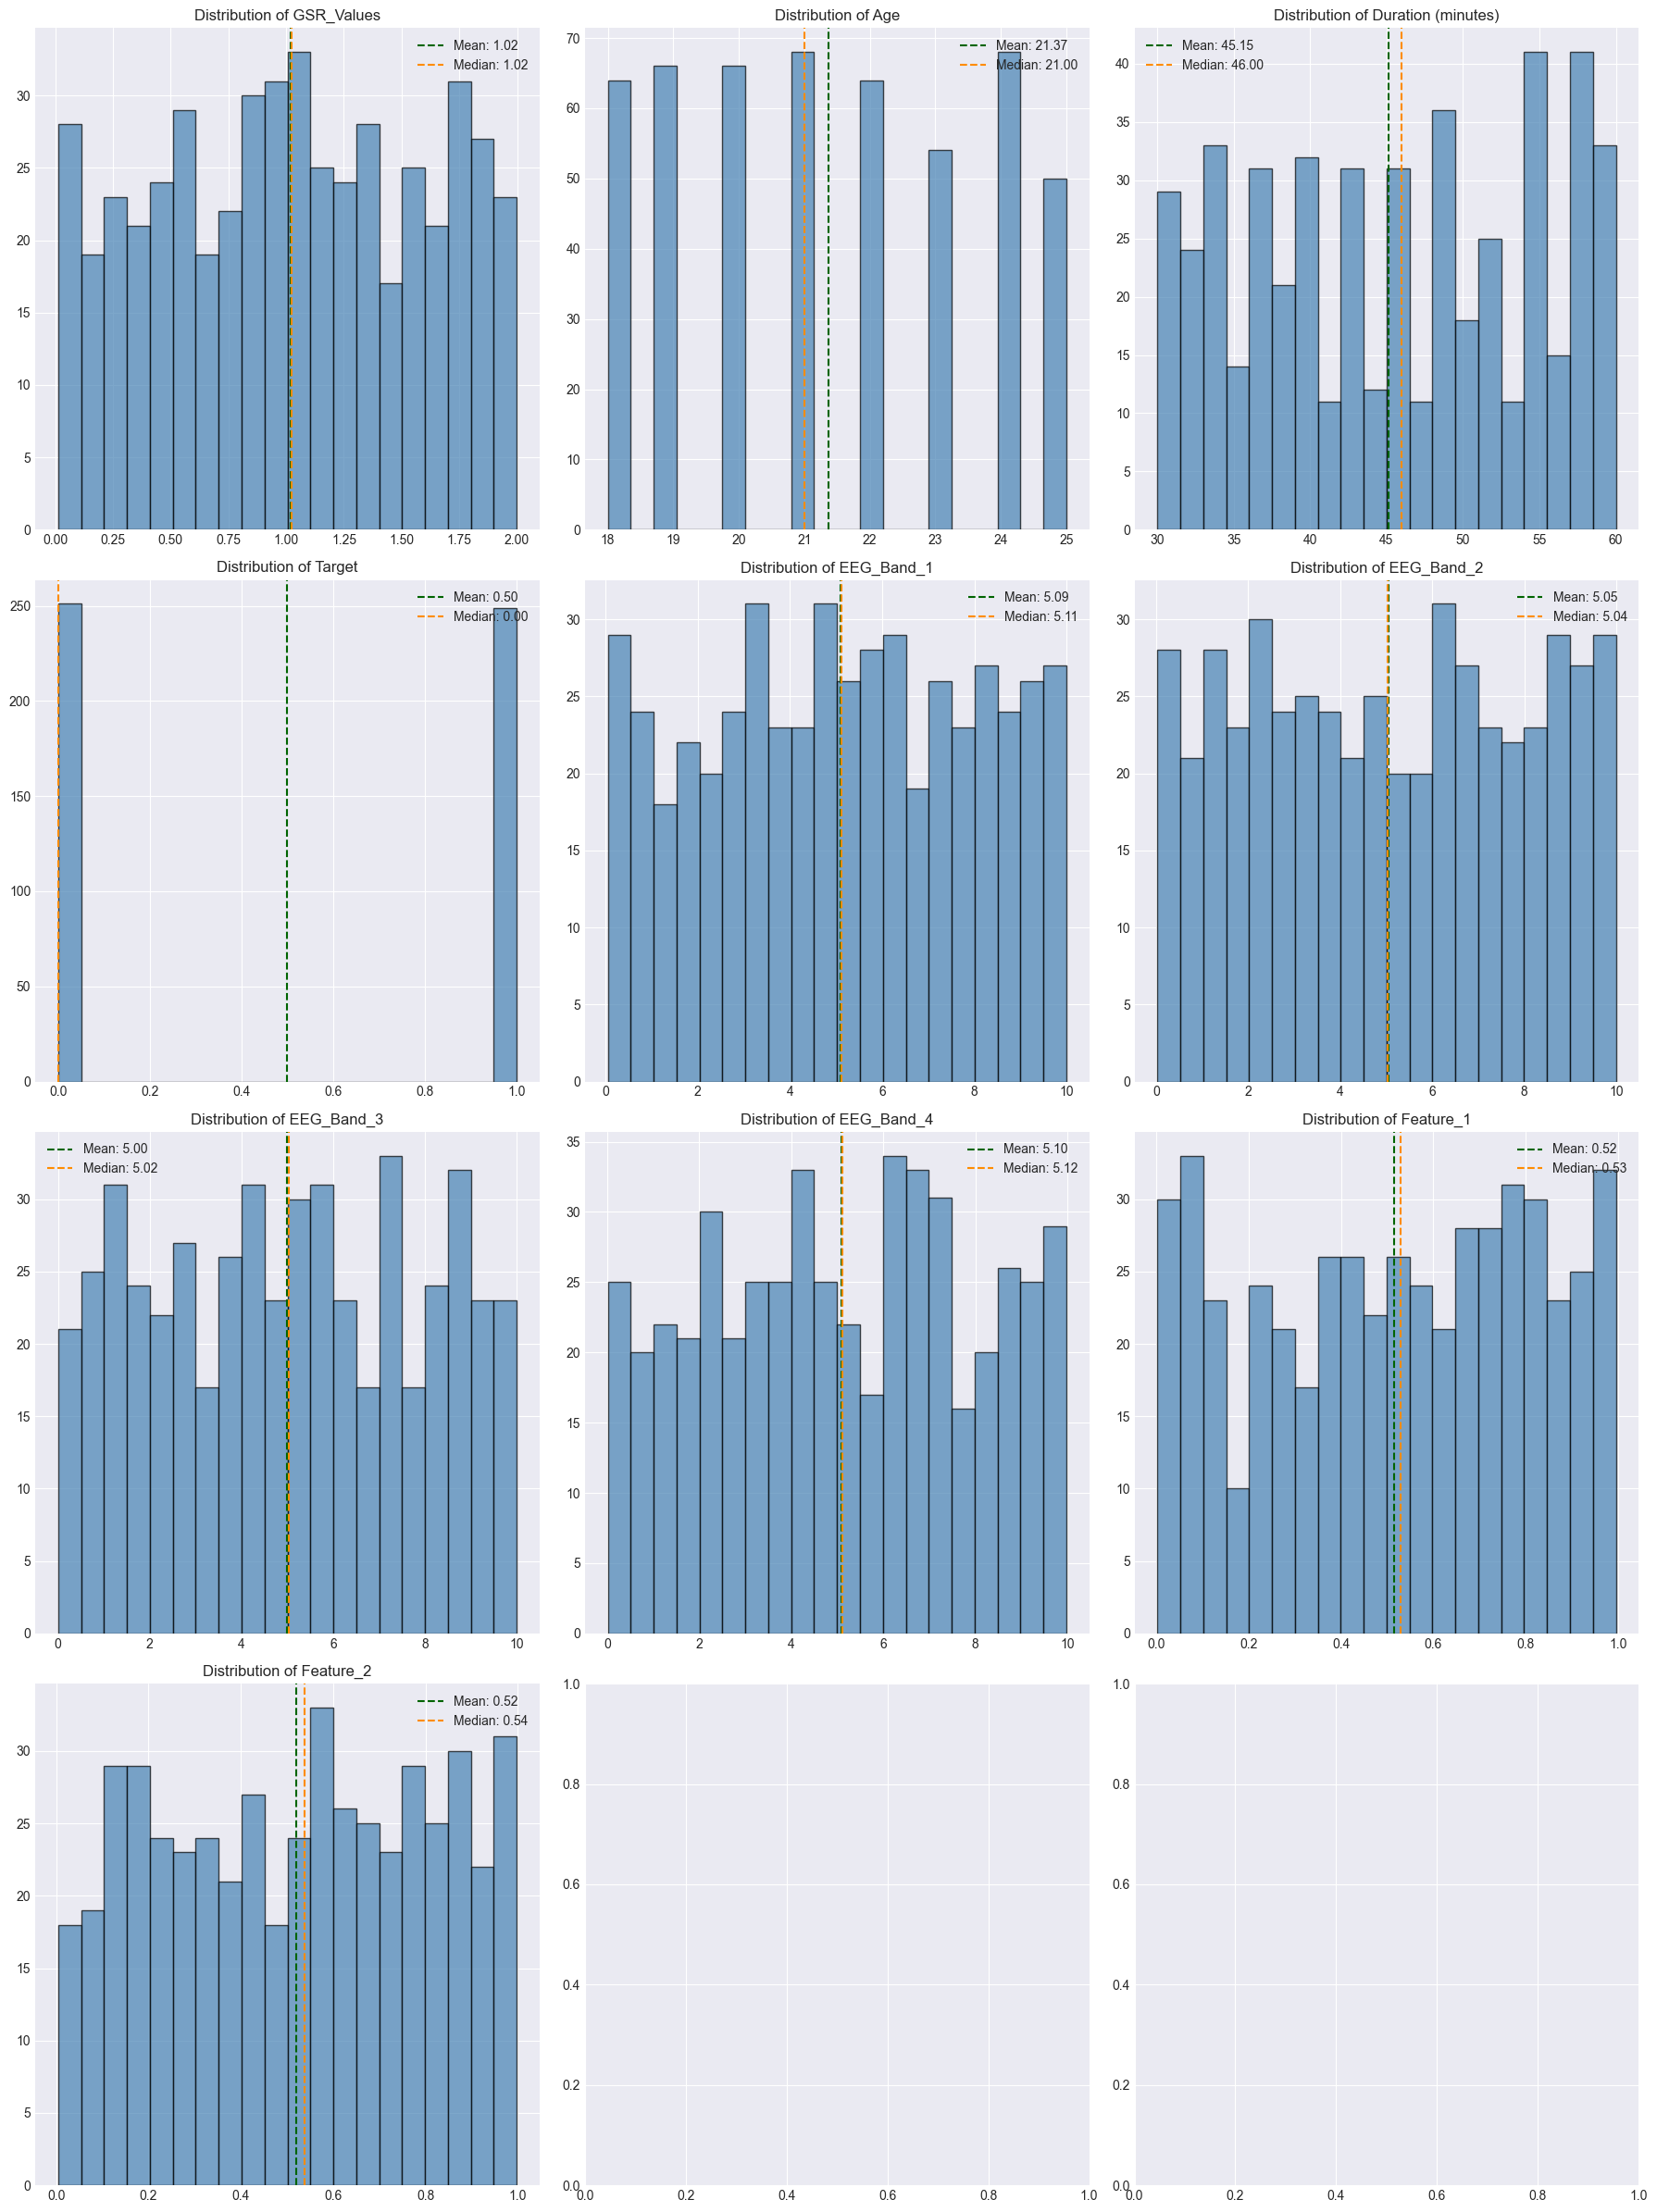


Skewness:
Age                   0.063864
Target                0.008024
EEG_Band_3           -0.004919
EEG_Band_2           -0.005177
Duration (minutes)   -0.017825
GSR_Values           -0.025025
EEG_Band_4           -0.025132
EEG_Band_1           -0.035861
Feature_2            -0.047607
Feature_1            -0.125202
dtype: float64

TARGET VARIABLE ANALYSIS


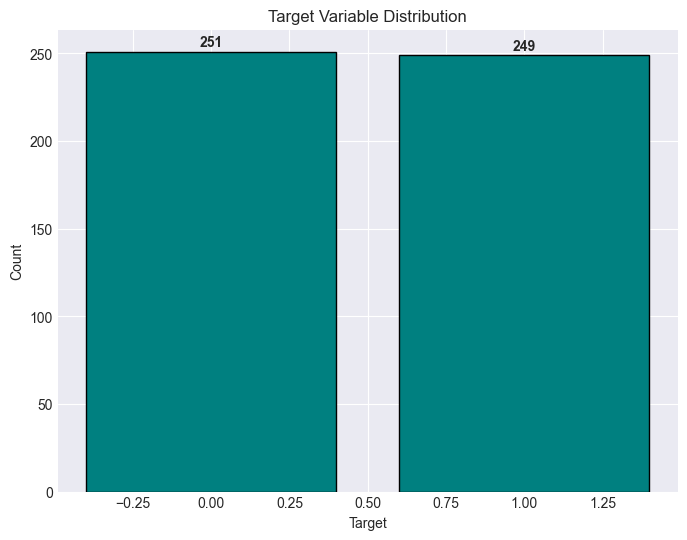

Target
0    251
1    249
Name: count, dtype: int64

Percentage Distribution:
Target
0    50.2
1    49.8
Name: count, dtype: float64

CORRELATION ANALYSIS


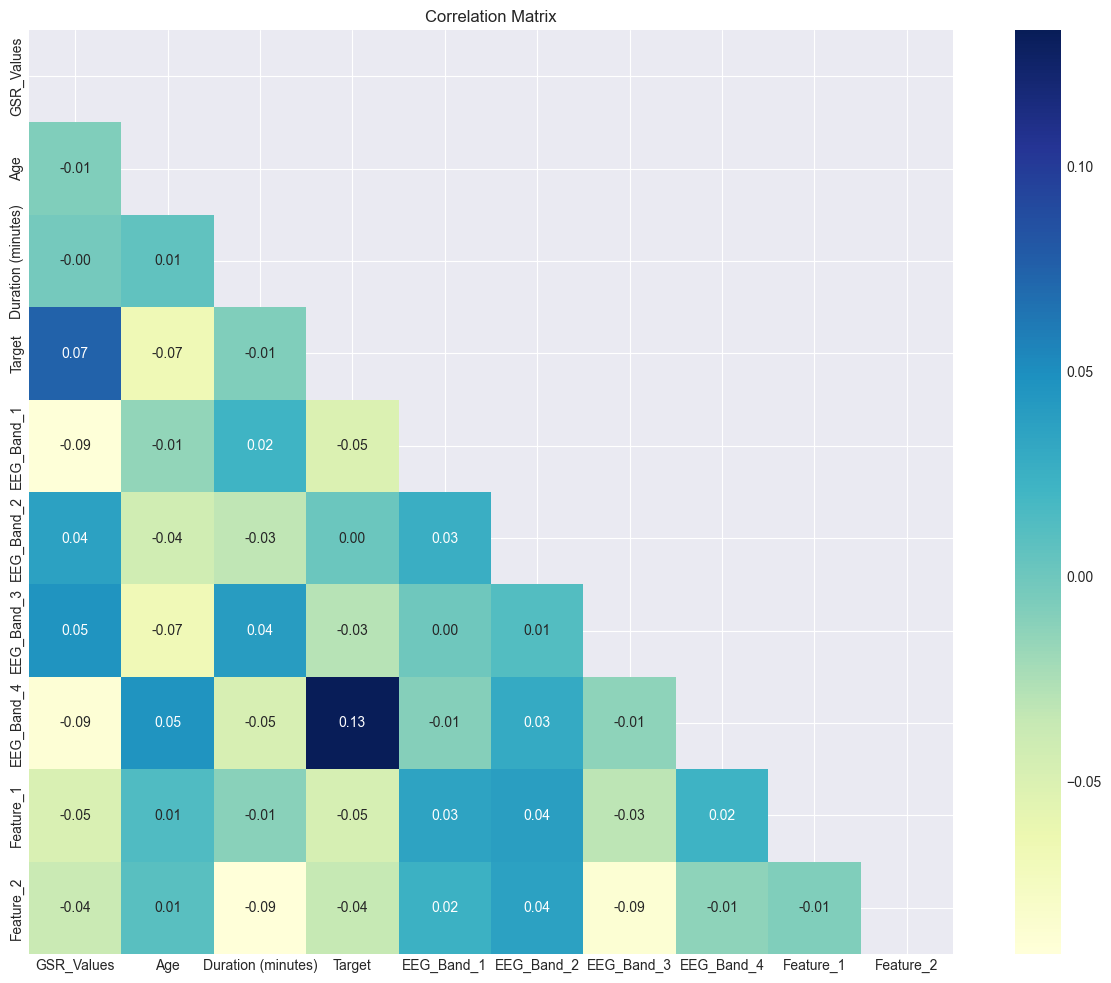


Top 5 Correlations with Target:
EEG_Band_4            0.133351
GSR_Values            0.074513
EEG_Band_2            0.001866
Duration (minutes)   -0.007971
EEG_Band_3           -0.028767
Name: Target, dtype: float64

Bottom 5 Correlations with Target:
EEG_Band_3   -0.028767
Feature_2    -0.035569
Feature_1    -0.047106
EEG_Band_1   -0.050623
Age          -0.066927
Name: Target, dtype: float64


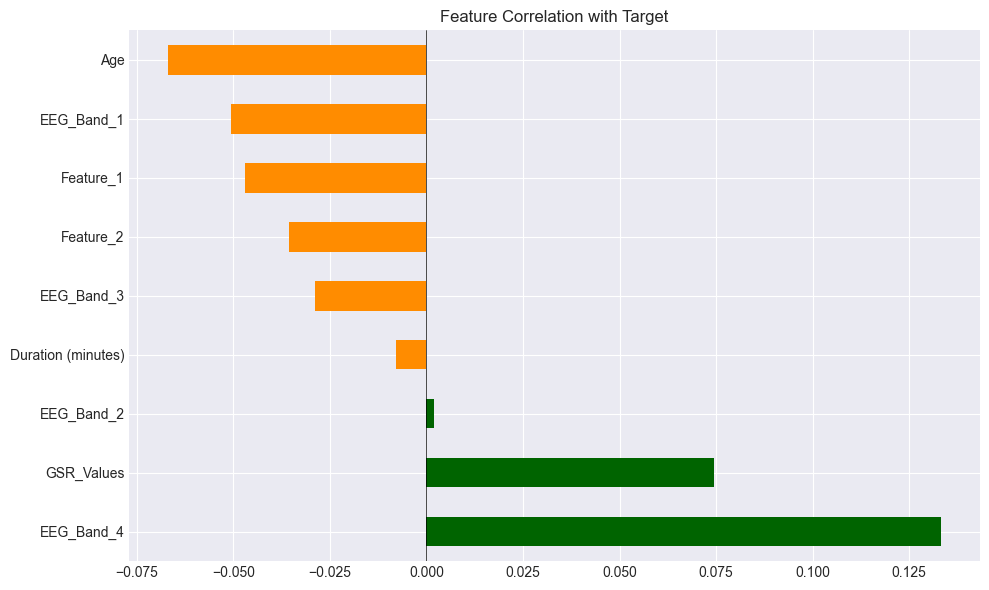


MULTICOLLINEARITY DETECTION
No high correlation pairs (|r| > 0.7)

BIVARIATE ANALYSIS


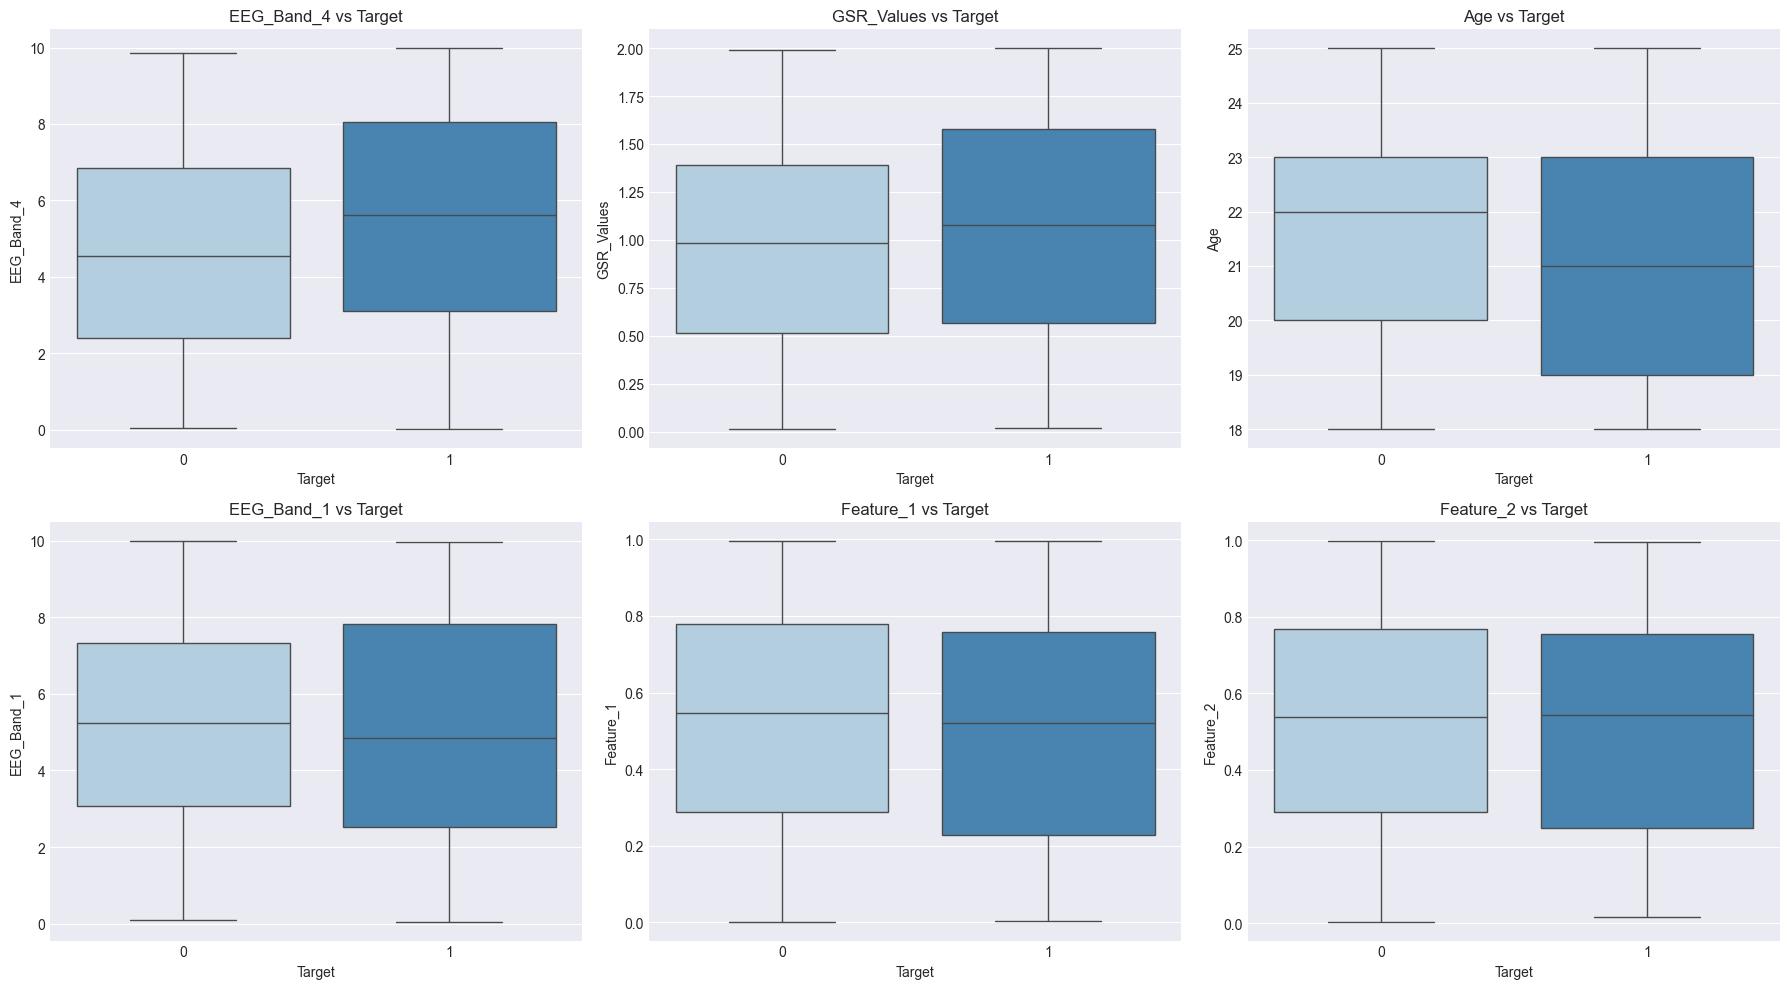


OUTLIER DETECTION
No significant outliers found across numerical features.

MUTUAL INFORMATION
                             Feature  MI Score
6                         EEG_Band_4  0.030627
4                         EEG_Band_2  0.028909
14                Session_Type_Study  0.020348
17  Environmental_Context_Quiet Room  0.016738
3                         EEG_Band_1  0.015394
16     Environmental_Context_Library  0.008251
12          Emotional_State_Stressed  0.005926
10           Cognitive_State_Focused  0.005334
1                                Age  0.000000
0                         GSR_Values  0.000000


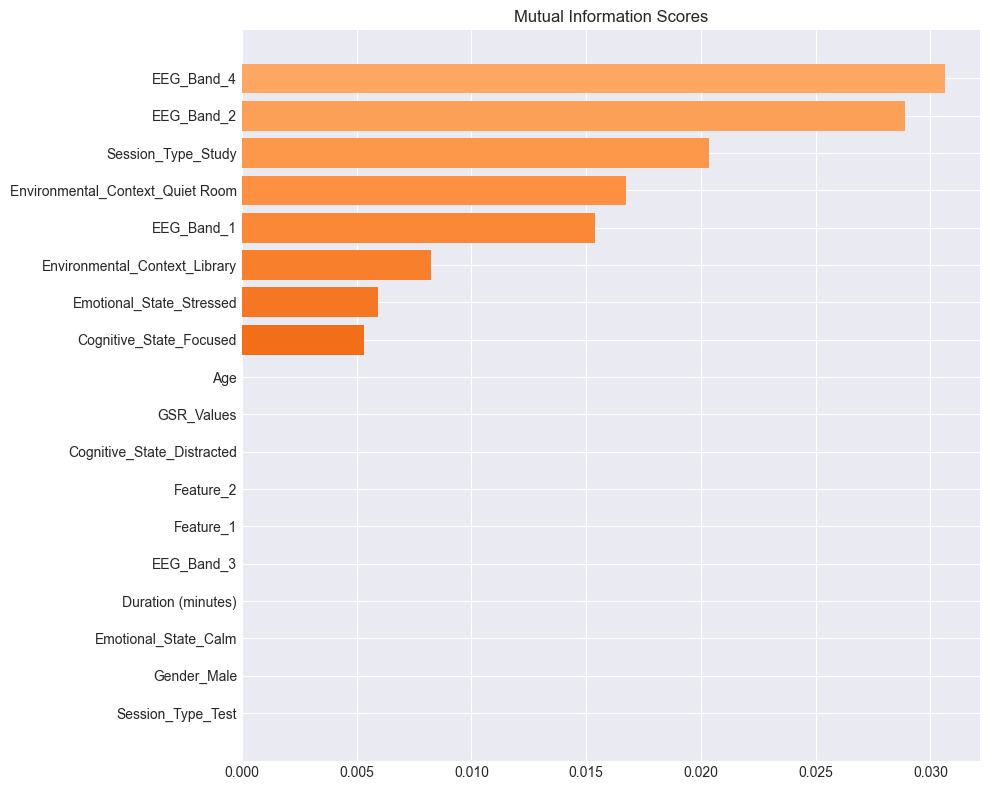


PCA DIMENSIONALITY REDUCTION


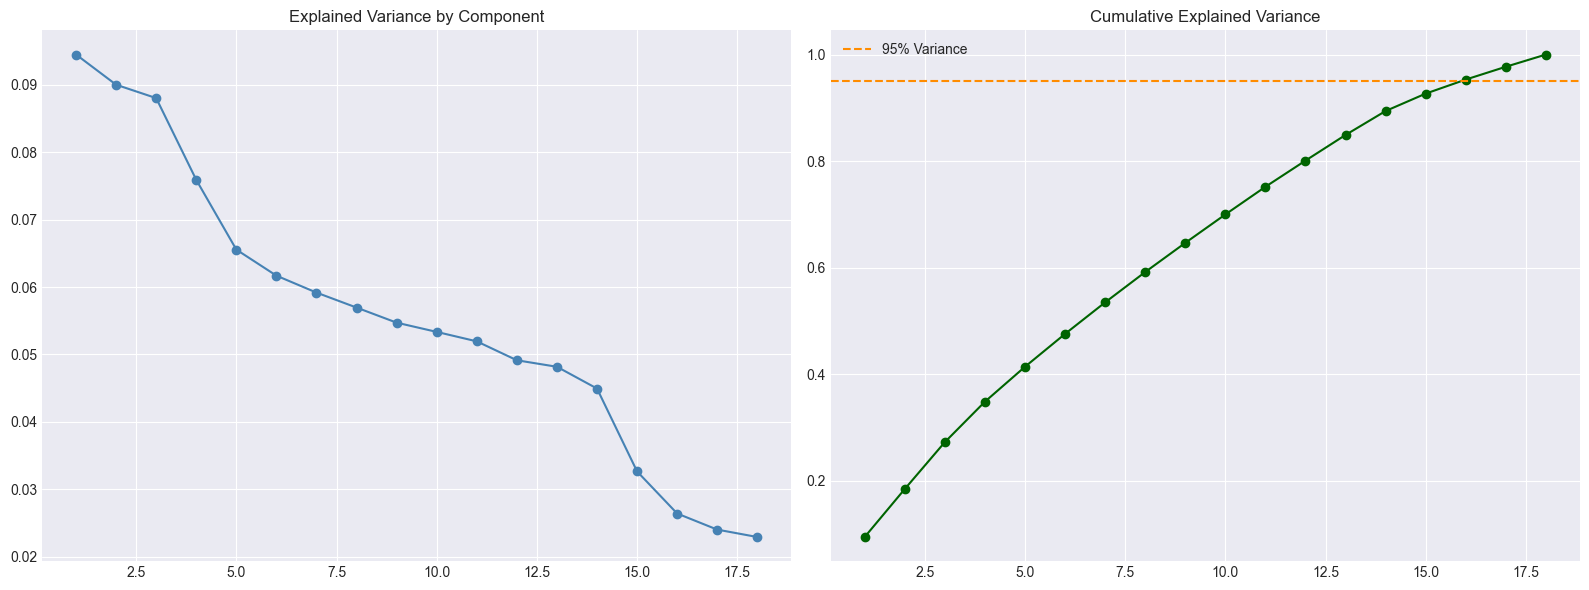

Components to reach 95% variance: 16

STATISTICAL TESTS
Normality test on Target: p-value = 0.0000 --> Not Normal

ANOVA on top correlated features:
EEG_Band_4: F = 9.02, p = 0.0028 --> Significant
GSR_Values: F = 2.78, p = 0.0961 --> Not Significant
Age: F = 2.24, p = 0.1351 --> Not Significant
EEG_Band_1: F = 1.28, p = 0.2585 --> Not Significant
Feature_1: F = 1.11, p = 0.2931 --> Not Significant
Feature_2: F = 0.63, p = 0.4274 --> Not Significant

PREPROCESSING RECOMMENDATIONS

Scaling: StandardScaler recommended for all ML models except tree-based ones.

Multicollinearity:
No multicollinearity detected.

Outliers:
No major outlier issues.

Feature Selection:
Use top 5 features from mutual information.

Target class distribution is balanced.


In [3]:
# Written by Ovi, 2025-07-21, Full EDA and feature handling for mental health wearable dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from scipy import stats

# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('data/mental_health_wearable_data.csv')

# Convert list-like strings to actual lists
df['EEG_Frequency_Bands'] = df['EEG_Frequency_Bands'].apply(ast.literal_eval)
df['Preprocessed_Features'] = df['Preprocessed_Features'].apply(ast.literal_eval)

# Expand list columns
eeg_df = pd.DataFrame(df['EEG_Frequency_Bands'].tolist(), columns=[f'EEG_Band_{i+1}' for i in range(4)])
features_df = pd.DataFrame(df['Preprocessed_Features'].tolist(), columns=['Feature_1', 'Feature_2'])

# Combine and clean
df = pd.concat([df.drop(['EEG_Frequency_Bands', 'Preprocessed_Features', 'Timestamp', 'Student_ID'], axis=1), eeg_df, features_df], axis=1)

# =============================================================================
# 1. DATASET OVERVIEW
# =============================================================================
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())
print("\nSample:")
print(df.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================
print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() else "No missing values.")

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

print("\nBasic Statistics:")
print(df.describe(include='all'))

# =============================================================================
# 3. UNIVARIATE ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(len(numeric_cols) // 3 + 1, 3, figsize=(18, 24))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='darkgreen', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='darkorange', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

print("\nSkewness:")
print(df[numeric_cols].skew().sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

target_counts = df['Target'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index, target_counts.values, color='teal', edgecolor='black')
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')
plt.savefig('stress_level_distribution.png')
plt.show()

print(target_counts)
print("\nPercentage Distribution:")
print((target_counts / len(df) * 100).round(2))

# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

target_corr = corr_matrix['Target'].drop('Target').sort_values(ascending=False)
print("\nTop 5 Correlations with Target:")
print(target_corr.head())
print("\nBottom 5 Correlations with Target:")
print(target_corr.tail())

plt.figure(figsize=(10, 6))
colors = ['darkgreen' if c > 0 else 'darkorange' for c in target_corr]
target_corr.plot(kind='barh', color=colors)
plt.title('Feature Correlation with Target')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.savefig('target_correlation.png')
plt.show()

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================
print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    for f1, f2, val in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
        print(f"{f1} & {f2}: {val:.2f}")
else:
    print("No high correlation pairs (|r| > 0.7)")

# =============================================================================
# 7. BIVARIATE ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

top_features = target_corr.abs().nlargest(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
for i, col in enumerate(top_features):
    sns.boxplot(data=df, x='Target', y=col, ax=axes[i], palette='Blues')
    axes[i].set_title(f'{col} vs Target')

plt.tight_layout()
plt.savefig('feature_vs_target_boxplots.png')
plt.show()

# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================
print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary[col] = {'count': count, 'percentage': 100 * count / len(df)}

outlier_df = pd.DataFrame(outlier_summary).T
# Show and plot only if outliers exist
outlier_filtered = outlier_df[outlier_df['count'] > 0]
if not outlier_filtered.empty:
    print(outlier_filtered)
    
    plt.figure(figsize=(12, 6))
    outlier_filtered['percentage'].plot(kind='bar', color='seagreen')
    plt.ylabel('Percentage of Outliers')
    plt.title('Outlier Percentage by Feature')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('outlier_percentages.png')
    plt.show()
else:
    print("No significant outliers found across numerical features.")


# =============================================================================
# 9. MUTUAL INFORMATION
# =============================================================================
print("\n" + "=" * 80)
print("MUTUAL INFORMATION")
print("=" * 80)

X = df.drop('Target', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['Target']
mi_scores = mutual_info_classif(X_encoded, y, random_state=42)

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
print(mi_df.head(10))

plt.figure(figsize=(10, 8))
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_df)))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color=colors)
plt.gca().invert_yaxis()
plt.title('Mutual Information Scores')
plt.tight_layout()
plt.savefig('mutual_information_scores.png')
plt.show()

# =============================================================================
# 10. PCA
# =============================================================================
print("\n" + "=" * 80)
print("PCA DIMENSIONALITY REDUCTION")
print("=" * 80)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(range(1, len(explained) + 1), explained, marker='o', color='steelblue')
ax1.set_title('Explained Variance by Component')
ax2.plot(range(1, len(cumulative) + 1), cumulative, marker='o', color='darkgreen')
ax2.axhline(y=0.95, linestyle='--', color='darkorange', label='95% Variance')
ax2.legend()
ax2.set_title('Cumulative Explained Variance')
plt.tight_layout()
plt.savefig('pca_analysis.png')
plt.show()

n_95 = np.argmax(cumulative >= 0.95) + 1
print(f"Components to reach 95% variance: {n_95}")

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================
print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

stat, pval = stats.normaltest(df['Target'])
print(f"Normality test on Target: p-value = {pval:.4f} --> {'Normal' if pval > 0.05 else 'Not Normal'}")

print("\nANOVA on top correlated features:")
for col in top_features:
    groups = [group[col].values for name, group in df.groupby('Target')]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{col}: F = {f_stat:.2f}, p = {p_val:.4f} --> {'Significant' if p_val < 0.05 else 'Not Significant'}")

# =============================================================================
# 12. PREPROCESSING RECOMMENDATIONS
# =============================================================================
print("\n" + "=" * 80)
print("PREPROCESSING RECOMMENDATIONS")
print("=" * 80)

print("\nScaling: StandardScaler recommended for all ML models except tree-based ones.")
print("\nMulticollinearity:")
if high_corr_pairs:
    print("Consider dropping one of each highly correlated pair.")
else:
    print("No multicollinearity detected.")

print("\nOutliers:")
outlier_count = outlier_df[outlier_df['percentage'] > 5].shape[0]
if outlier_count > 0:
    print(f"{outlier_count} features have >5% outliers. Consider capping or robust scaling.")
else:
    print("No major outlier issues.")

print("\nFeature Selection:")
print(f"Use top {len(mi_df[mi_df['MI Score'] > 0.01])} features from mutual information.")

imbalance = target_counts.min() / target_counts.max()
if imbalance < 0.8:
    print("\nClass Imbalance Detected. Consider class weights or SMOTE.")
else:
    print("\nTarget class distribution is balanced.")


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from scipy import stats
from scipy.signal import welch
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
df = pd.read_csv('data/mental_health_wearable_data.csv')

print("=" * 80)
print("MENTAL HEALTH MONITOR USING WEARABLE IOT SENSORS")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display data types
print("\nData Types:")
print(df.dtypes)

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Identify feature categories based on dataset description
eeg_bands = ['delta', 'theta', 'alpha', 'beta']
physiological_features = ['GSR', 'Mean GSR']
categorical_cols = ['Cognitive State', 'Emotional State', 'Gender', 'Session Type', 'Environment']
demographic_cols = ['ID', 'Age']
target_col = 'Stress Label'

# Handle potential column name variations
# Check if columns exist and adjust names if needed
actual_columns = df.columns.tolist()
print("\nColumn Classification:")
print(f"EEG Bands: {[col for col in eeg_bands if col in actual_columns]}")
print(f"Physiological: {[col for col in physiological_features if col in actual_columns]}")
print(f"Categorical: {[col for col in categorical_cols if col in actual_columns]}")
print(f"Target: {target_col if target_col in actual_columns else 'Target column not found'}")

# Basic statistics for numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['ID']]
print("\nBasic Statistics (Numerical Features):")
print(df[numerical_cols].describe())

# =============================================================================
# 3. EEG BAND ANALYSIS AND NEUROSCIENCE-BASED FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("EEG BAND ANALYSIS")
print("=" * 80)

# Create EEG band ratios (important for mental state analysis)
available_eeg_bands = [band for band in eeg_bands if band in df.columns]

if len(available_eeg_bands) >= 2:
    # Common EEG ratios used in stress/mental health analysis
    if 'theta' in df.columns and 'beta' in df.columns:
        df['theta_beta_ratio'] = df['theta'] / (df['beta'] + 1e-6)  # Avoid division by zero
        print("Created theta/beta ratio - indicator of mental fatigue")
    
    if 'alpha' in df.columns and 'beta' in df.columns:
        df['alpha_beta_ratio'] = df['alpha'] / (df['beta'] + 1e-6)
        print("Created alpha/beta ratio - relaxation indicator")
    
    if 'theta' in df.columns and 'alpha' in df.columns:
        df['theta_alpha_ratio'] = df['theta'] / (df['alpha'] + 1e-6)
        print("Created theta/alpha ratio - drowsiness indicator")
    
    # Total power across bands
    df['total_eeg_power'] = df[available_eeg_bands].sum(axis=1)
    print("Created total EEG power feature")
    
    # Relative band powers
    for band in available_eeg_bands:
        df[f'{band}_relative'] = df[band] / (df['total_eeg_power'] + 1e-6)
        print(f"Created relative {band} power")

# Visualize EEG band distributions
if available_eeg_bands:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, band in enumerate(available_eeg_bands[:4]):
        # Distribution by stress level
        stress_0 = df[df[target_col] == 0][band].dropna()
        stress_1 = df[df[target_col] == 1][band].dropna()
        
        axes[idx].hist(stress_0, bins=20, alpha=0.5, label='Low Stress', color='lightblue', edgecolor='black')
        axes[idx].hist(stress_1, bins=20, alpha=0.5, label='High Stress', color='salmon', edgecolor='black')
        axes[idx].set_title(f'{band.upper()} Band Distribution by Stress Level', fontweight='bold')
        axes[idx].set_xlabel(f'{band} Power')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.savefig('eeg_band_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 4. GSR (GALVANIC SKIN RESPONSE) ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("GSR ANALYSIS")
print("=" * 80)

# GSR feature engineering
if 'GSR' in df.columns:
    # Calculate GSR statistics per session/student
    if 'ID' in df.columns:
        # Rolling statistics for GSR (simulating temporal features)
        df['GSR_rolling_mean'] = df.groupby('ID')['GSR'].transform(lambda x: x.rolling(3, min_periods=1).mean())
        df['GSR_rolling_std'] = df.groupby('ID')['GSR'].transform(lambda x: x.rolling(3, min_periods=1).std())
        df['GSR_change_rate'] = df.groupby('ID')['GSR'].diff()
        print("Created GSR temporal features")
    
    # Visualize GSR patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # GSR distribution by stress level
    axes[0, 0].violinplot([df[df[target_col] == 0]['GSR'].dropna(), 
                          df[df[target_col] == 1]['GSR'].dropna()], 
                         positions=[0, 1], showmeans=True)
    axes[0, 0].set_xticks([0, 1])
    axes[0, 0].set_xticklabels(['Low Stress', 'High Stress'])
    axes[0, 0].set_title('GSR Distribution by Stress Level', fontweight='bold')
    axes[0, 0].set_ylabel('GSR Value')
    
    # GSR vs EEG correlations
    if 'alpha' in df.columns:
        axes[0, 1].scatter(df['GSR'], df['alpha'], alpha=0.5, c=df[target_col], cmap='RdYlBu')
        axes[0, 1].set_xlabel('GSR')
        axes[0, 1].set_ylabel('Alpha Band Power')
        axes[0, 1].set_title('GSR vs Alpha Band (colored by stress)', fontweight='bold')
    
    # GSR by cognitive state
    if 'Cognitive State' in df.columns:
        cognitive_gsr = df.groupby('Cognitive State')['GSR'].mean().sort_values()
        axes[1, 0].bar(range(len(cognitive_gsr)), cognitive_gsr.values, color='teal')
        axes[1, 0].set_xticks(range(len(cognitive_gsr)))
        axes[1, 0].set_xticklabels(cognitive_gsr.index, rotation=45, ha='right')
        axes[1, 0].set_title('Average GSR by Cognitive State', fontweight='bold')
        axes[1, 0].set_ylabel('Average GSR')
    
    # GSR by emotional state
    if 'Emotional State' in df.columns:
        emotional_gsr = df.groupby('Emotional State')['GSR'].mean().sort_values()
        axes[1, 1].bar(range(len(emotional_gsr)), emotional_gsr.values, color='coral')
        axes[1, 1].set_xticks(range(len(emotional_gsr)))
        axes[1, 1].set_xticklabels(emotional_gsr.index, rotation=45, ha='right')
        axes[1, 1].set_title('Average GSR by Emotional State', fontweight='bold')
        axes[1, 1].set_ylabel('Average GSR')
    
    plt.tight_layout()
    plt.savefig('gsr_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 5. COGNITIVE AND EMOTIONAL STATE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("COGNITIVE AND EMOTIONAL STATE ANALYSIS")
print("=" * 80)

# Cross-tabulation of cognitive and emotional states
if 'Cognitive State' in df.columns and 'Emotional State' in df.columns:
    # Create a heatmap of state combinations
    state_crosstab = pd.crosstab(df['Cognitive State'], df['Emotional State'], normalize='all') * 100
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(state_crosstab, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Percentage (%)'})
    plt.title('Distribution of Cognitive-Emotional State Combinations', fontsize=14, fontweight='bold')
    plt.xlabel('Emotional State')
    plt.ylabel('Cognitive State')
    plt.tight_layout()
    plt.savefig('state_combinations_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Stress prevalence by state combinations
    stress_by_states = df.groupby(['Cognitive State', 'Emotional State'])[target_col].agg(['mean', 'count'])
    stress_by_states = stress_by_states.sort_values('mean', ascending=False)
    print("\nStress Prevalence by State Combinations:")
    print(stress_by_states.head(10))

# =============================================================================
# 6. TARGET VARIABLE (STRESS LABEL) ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("STRESS LABEL ANALYSIS")
print("=" * 80)

# Stress distribution
plt.figure(figsize=(10, 6))
stress_counts = df[target_col].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values, 
               color=['lightgreen', 'salmon'], edgecolor='black', alpha=0.8)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Stress Labels', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Low Stress (0)', 'High Stress (1)'])
# Add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig('stress_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStress Label Distribution:")
print(stress_counts)
print(f"\nPercentage Distribution:")
print((stress_counts / len(df) * 100).round(2))

# Class imbalance ratio
imbalance_ratio = stress_counts.max() / stress_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")

# =============================================================================
# 7. SESSION CONTEXT ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("SESSION CONTEXT ANALYSIS")
print("=" * 80)

# Analyze session types and their impact on stress
if 'Session Type' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Stress by session type
    session_stress = df.groupby('Session Type')[target_col].agg(['mean', 'count'])
    axes[0, 0].bar(range(len(session_stress)), session_stress['mean'], color='steelblue', alpha=0.8)
    axes[0, 0].set_xticks(range(len(session_stress)))
    axes[0, 0].set_xticklabels(session_stress.index, rotation=45, ha='right')
    axes[0, 0].set_title('Stress Rate by Session Type', fontweight='bold')
    axes[0, 0].set_ylabel('Stress Rate')
    axes[0, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
    
    # Session duration analysis
    if 'Session Duration' in df.columns:
        # Duration by stress level
        axes[0, 1].violinplot([df[df[target_col] == 0]['Session Duration'].dropna(),
                              df[df[target_col] == 1]['Session Duration'].dropna()],
                             positions=[0, 1], showmeans=True)
        axes[0, 1].set_xticks([0, 1])
        axes[0, 1].set_xticklabels(['Low Stress', 'High Stress'])
        axes[0, 1].set_title('Session Duration by Stress Level', fontweight='bold')
        axes[0, 1].set_ylabel('Duration (minutes)')
    
    # Environment analysis
    if 'Environment' in df.columns:
        env_stress = df.groupby('Environment')[target_col].mean().sort_values(ascending=False)
        axes[1, 0].barh(range(len(env_stress)), env_stress.values, color='teal', alpha=0.8)
        axes[1, 0].set_yticks(range(len(env_stress)))
        axes[1, 0].set_yticklabels(env_stress.index)
        axes[1, 0].set_title('Stress Rate by Environment', fontweight='bold')
        axes[1, 0].set_xlabel('Stress Rate')
        axes[1, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    
    # Combined session characteristics
    if 'Session Duration' in df.columns and 'Environment' in df.columns:
        pivot_data = df.pivot_table(values=target_col, index='Session Type', 
                                   columns='Environment', aggfunc='mean')
        sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn_r', 
                   ax=axes[1, 1], cbar_kws={'label': 'Stress Rate'})
        axes[1, 1].set_title('Stress Rate: Session Type × Environment', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('session_context_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 8. COMPREHENSIVE CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Prepare numerical features for correlation
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] 
                     and col not in ['ID', 'Timestamp']]

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with stress
if target_col in correlation_matrix.columns:
    stress_correlations = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)
    print("\nTop Features Positively Correlated with Stress:")
    print(stress_correlations.head(10))
    print("\nTop Features Negatively Correlated with Stress:")
    print(stress_correlations.tail(10))
    
    # Visualize correlations with stress
    plt.figure(figsize=(10, 8))
    colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
    stress_correlations.plot(kind='barh', color=colors)
    plt.xlabel('Correlation with Stress Label', fontsize=12)
    plt.title('Feature Correlations with Stress', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 9. MULTIVARIATE ANALYSIS - FEATURE INTERACTIONS
# =============================================================================

print("\n" + "=" * 80)
print("MULTIVARIATE ANALYSIS")
print("=" * 80)

# Analyze EEG band interactions
if all(band in df.columns for band in ['alpha', 'beta']):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Alpha vs Beta by stress
    scatter = axes[0, 0].scatter(df['alpha'], df['beta'], c=df[target_col], 
                                cmap='RdYlBu', alpha=0.6, edgecolors='black', linewidth=0.5)
    axes[0, 0].set_xlabel('Alpha Power')
    axes[0, 0].set_ylabel('Beta Power')
    axes[0, 0].set_title('Alpha vs Beta Power (colored by stress)', fontweight='bold')
    plt.colorbar(scatter, ax=axes[0, 0], label='Stress Level')
    
    # Theta/Beta ratio distribution
    if 'theta_beta_ratio' in df.columns:
        axes[0, 1].hist(df[df[target_col] == 0]['theta_beta_ratio'].dropna(), bins=20, 
                       alpha=0.5, label='Low Stress', color='lightblue')
        axes[0, 1].hist(df[df[target_col] == 1]['theta_beta_ratio'].dropna(), bins=20, 
                       alpha=0.5, label='High Stress', color='salmon')
        axes[0, 1].set_xlabel('Theta/Beta Ratio')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('Theta/Beta Ratio Distribution', fontweight='bold')
        axes[0, 1].legend()
    
    # GSR vs Total EEG Power
    if 'GSR' in df.columns and 'total_eeg_power' in df.columns:
        scatter2 = axes[1, 0].scatter(df['GSR'], df['total_eeg_power'], 
                                     c=df[target_col], cmap='RdYlBu', alpha=0.6)
        axes[1, 0].set_xlabel('GSR')
        axes[1, 0].set_ylabel('Total EEG Power')
        axes[1, 0].set_title('GSR vs Total EEG Power', fontweight='bold')
        plt.colorbar(scatter2, ax=axes[1, 0], label='Stress Level')
    
    # Feature importance preview
    feature_importance = stress_correlations.abs().sort_values(ascending=False).head(10)
    axes[1, 1].barh(range(len(feature_importance)), feature_importance.values, color='teal')
    axes[1, 1].set_yticks(range(len(feature_importance)))
    axes[1, 1].set_yticklabels(feature_importance.index)
    axes[1, 1].set_xlabel('Absolute Correlation')
    axes[1, 1].set_title('Top 10 Features by Correlation', fontweight='bold')
    axes[1, 1].invert_yaxis()
    
    plt.tight_layout()
    plt.savefig('multivariate_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 10. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method
outlier_summary = {}
for col in numerical_features:
    if df[col].notna().sum() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0][['count', 'percentage']])

# Visualize outliers
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    plt.figure(figsize=(12, 6))
    outlier_features = outlier_df[outlier_df['count'] > 0].head(15)
    plt.bar(range(len(outlier_features)), outlier_features['percentage'], 
            color='seagreen', alpha=0.8, edgecolor='black')
    plt.xticks(range(len(outlier_features)), outlier_features.index, rotation=45, ha='right')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Outliers', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 11. FEATURE IMPORTANCE USING MULTIPLE METHODS
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Prepare data for feature importance
# Encode categorical variables
le_dict = {}
df_encoded = df.copy()

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df[col].fillna('Unknown'))
        le_dict[col] = le

# Combine all features
all_feature_cols = numerical_features + [col + '_encoded' for col in categorical_cols if col in df.columns]
all_feature_cols = [col for col in all_feature_cols if col != target_col]

X = df_encoded[all_feature_cols].fillna(0)
y = df_encoded[target_col]

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': all_feature_cols,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("\nTop 20 Features by Mutual Information:")
print(mi_scores_df.head(20))

# Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Mutual Information scores
colors1 = plt.cm.Oranges(np.linspace(0.4, 0.9, 20))
ax1.barh(range(20), mi_scores_df['MI Score'].head(20).values, color=colors1)
ax1.set_yticks(range(20))
ax1.set_yticklabels(mi_scores_df['Feature'].head(20).values)
ax1.set_xlabel('Mutual Information Score', fontsize=12)
ax1.set_title('Top 20 Features by Mutual Information', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Feature categories importance
feature_categories = {
    'EEG Bands': [f for f in all_feature_cols if any(band in f for band in eeg_bands)],
    'EEG Ratios': [f for f in all_feature_cols if 'ratio' in f],
    'GSR Features': [f for f in all_feature_cols if 'GSR' in f.upper()],
    'Session Features': [f for f in all_feature_cols if any(s in f for s in ['Session', 'Duration', 'Environment'])],
    'State Features': [f for f in all_feature_cols if any(s in f for s in ['Cognitive', 'Emotional'])],
    'Demographics': [f for f in all_feature_cols if any(s in f for s in ['Age', 'Gender'])]
}

category_importance = {}
for cat, features in feature_categories.items():
    cat_features = [f for f in features if f in mi_scores_df['Feature'].values]
    if cat_features:
        category_importance[cat] = mi_scores_df[mi_scores_df['Feature'].isin(cat_features)]['MI Score'].mean()

if category_importance:
    cat_df = pd.DataFrame(list(category_importance.items()), columns=['Category', 'Avg MI Score'])
    cat_df = cat_df.sort_values('Avg MI Score', ascending=False)
    
    ax2.bar(range(len(cat_df)), cat_df['Avg MI Score'], color='teal', alpha=0.8, edgecolor='black')
    ax2.set_xticks(range(len(cat_df)))
    ax2.set_xticklabels(cat_df['Category'], rotation=45, ha='right')
    ax2.set_ylabel('Average MI Score', fontsize=12)
    ax2.set_title('Feature Category Importance', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 12. DIMENSIONALITY REDUCTION AND VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Scree plot
ax1.plot(range(1, min(21, len(explained_variance_ratio) + 1)), 
         explained_variance_ratio[:20], 'o-', 
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', 
         color='darkgreen', markersize=6, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='90% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 2D PCA visualization
colors = ['lightblue', 'salmon']
for i in range(2):
    mask = y == i
    ax3.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i], 
               label=f'{"Low" if i == 0 else "High"} Stress', 
               alpha=0.6, edgecolors='black', linewidth=0.5)
ax3.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontsize=12)
ax3.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontsize=12)
ax3.set_title('2D PCA Projection', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of components for different variance thresholds
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")

# =============================================================================
# 13. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of key features
print("\nNormality Tests (Shapiro-Wilk):")
for feature in ['GSR', 'alpha', 'beta', 'theta', 'delta']:
    if feature in df.columns:
        stat, p_val = stats.shapiro(df[feature].dropna()[:5000])  # Limit sample size
        print(f"{feature}: p-value = {p_val:.4f} ({'Normal' if p_val > 0.05 else 'Non-normal'})")

# T-tests for numerical features between stress groups
print("\nT-tests (Low Stress vs High Stress):")
significant_features = []
for feature in numerical_features:
    if feature != target_col:
        group0 = df[df[target_col] == 0][feature].dropna()
        group1 = df[df[target_col] == 1][feature].dropna()
        if len(group0) > 0 and len(group1) > 0:
            t_stat, p_val = stats.ttest_ind(group0, group1)
            if p_val < 0.05:
                significant_features.append((feature, p_val))
                print(f"{feature}: t={t_stat:.3f}, p={p_val:.4f} ***")

# Chi-square tests for categorical features vs stress
print("\nChi-Square Tests (Categorical Features vs Stress):")
for feature in categorical_cols:
    if feature in df.columns:
        contingency_table = pd.crosstab(df[feature], df[target_col])
        chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"{feature}: χ²={chi2:.3f}, p={p_val:.4f} {'***' if p_val < 0.05 else ''}")

# =============================================================================
# 14. ADVANCED PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("ADVANCED PREPROCESSING RECOMMENDATIONS FOR ML")
print("=" * 80)

print("\n1. DOMAIN-SPECIFIC FEATURE ENGINEERING:")
print("   ✓ EEG band ratios created (theta/beta, alpha/beta, theta/alpha)")
print("   ✓ Relative band powers calculated")
print("   ✓ GSR temporal features (rolling statistics, change rate)")
print("   - Consider: Spectral entropy, coherence between bands")
print("   - Consider: Heart rate variability if available")
print("   - Consider: Circadian rhythm features from timestamps")

print("\n2. SIGNAL PROCESSING:")
print("   - Apply bandpass filters to EEG signals (0.5-50 Hz)")
print("   - Remove artifacts using ICA (already mentioned in dataset)")
print("   - Normalize EEG bands by total power")
print("   - Apply wavelet decomposition for time-frequency features")

print("\n3. HANDLING PHYSIOLOGICAL VARIABILITY:")
print("   - Z-score normalization within subjects")
print("   - Baseline correction using rest periods")
print("   - Consider person-specific models or mixed-effects approaches")

print("\n4. TEMPORAL MODELING:")
print("   - Use sliding windows for feature extraction")
print("   - Consider LSTM/GRU for sequential patterns")
print("   - Extract trend and seasonality components")

print("\n5. CLASS IMBALANCE HANDLING:")
if imbalance_ratio > 1.5:
    print(f"   - Imbalance ratio: {imbalance_ratio:.2f}:1")
    print("   - Use SMOTE or ADASYN for oversampling")
    print("   - Consider cost-sensitive learning")
    print("   - Use stratified k-fold cross-validation")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION STRATEGY:")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.05])} features (MI > 0.05)")
print("   - Use recursive feature elimination with CV")
print("   - Consider domain knowledge for feature groups")
print("   - Test interaction terms between EEG and GSR")

print("\n7. MODEL RECOMMENDATIONS:")
print("   - Ensemble methods: Random Forest, XGBoost (handle mixed data types)")
print("   - Neural networks: Consider 1D CNN for raw signals")
print("   - SVM with RBF kernel (after scaling)")
print("   - Logistic regression as baseline")

print("\n8. VALIDATION STRATEGY:")
print("   - Use subject-wise split (avoid data leakage)")
print("   - Time-based validation for deployment")
print("   - Cross-validation within subjects")
print("   - External validation on held-out subjects")

# =============================================================================
# 15. SAVE COMPREHENSIVE ANALYSIS SUMMARY
# =============================================================================

# Create a detailed summary report
summary_report = f"""
MENTAL HEALTH WEARABLE IOT SENSORS - ANALYSIS SUMMARY
===================================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- Unique Students: {df['ID'].nunique() if 'ID' in df.columns else 'N/A'}
- Sensors Used: EEG (4 bands), GSR

Target Variable (Stress Label):
- Distribution: {stress_counts.to_dict()}
- Class Imbalance Ratio: {imbalance_ratio:.2f}:1

EEG Analysis:
- Available Bands: {', '.join(available_eeg_bands)}
- Band Ratios Created: theta/beta, alpha/beta, theta/alpha
- Relative Powers: Calculated for each band

GSR Analysis:
- Mean GSR: {df['GSR'].mean():.2f} (±{df['GSR'].std():.2f}) if 'GSR' in df.columns else 'N/A'
- Temporal Features: Rolling statistics, change rate

Cognitive-Emotional States:
- Most Common Cognitive State: {df['Cognitive State'].mode()[0] if 'Cognitive State' in df.columns else 'N/A'}
- Most Common Emotional State: {df['Emotional State'].mode()[0] if 'Emotional State' in df.columns else 'N/A'}
- Highest Stress Combination: Check state_combinations_heatmap.png

Session Context:
- Session Types: {df['Session Type'].nunique() if 'Session Type' in df.columns else 'N/A'} unique types
- Environments: {df['Environment'].nunique() if 'Environment' in df.columns else 'N/A'} unique environments
- Average Session Duration: {df['Session Duration'].mean():.1f} minutes if 'Session Duration' in df.columns else 'N/A'

Feature Importance:
Top 5 Features by Mutual Information:
{mi_scores_df.head(5).to_string()}

Statistical Insights:
- Significant Features (p<0.05): {len(significant_features)}
- PCA Components for 90% variance: {n_components_90}
- PCA Components for 95% variance: {n_components_95}

Key Recommendations:
1. Use subject-wise data splitting to avoid leakage
2. Implement band ratio features for mental state detection
3. Consider ensemble methods for robustness
4. Apply proper signal preprocessing for EEG data
5. Handle class imbalance with appropriate techniques

Files Generated:
- eeg_band_distributions.png
- gsr_analysis.png
- state_combinations_heatmap.png
- stress_distribution.png
- session_context_analysis.png
- correlation_matrix.png
- stress_correlations.png
- multivariate_analysis.png
- outlier_percentages.png
- feature_importance_analysis.png
- pca_analysis.png
- mental_health_analysis_summary.txt

Ready for advanced ML modeling with physiological signal processing!
"""

# Save summary to file
with open('mental_health_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("COMPREHENSIVE ANALYSIS COMPLETE!")
print("=" * 80)
print("\nThis analysis provides deep insights into:")
print("- EEG band patterns and their relationship with stress")
print("- GSR responses across different mental states")
print("- Cognitive-emotional state interactions")
print("- Session context effects on stress levels")
print("- Actionable preprocessing strategies for wearable sensor data")
print("\nRefer to the generated visualizations and summary file for detailed insights!")

MENTAL HEALTH MONITOR USING WEARABLE IOT SENSORS
Dataset Shape: (500, 13)
Total Records: 500
Total Features: 13

Column Names:
['Timestamp', 'EEG_Frequency_Bands', 'GSR_Values', 'Cognitive_State', 'Emotional_State', 'Student_ID', 'Age', 'Gender', 'Session_Type', 'Duration (minutes)', 'Environmental_Context', 'Preprocessed_Features', 'Target']

First 5 rows of the dataset:
             Timestamp                                EEG_Frequency_Bands  \
0  2025-01-01 10:00:00  [7.400574384984986, 5.621240954745124, 4.62440...   
1  2025-01-01 10:05:00  [1.6898477932146672, 7.2616994947041125, 1.106...   
2  2025-01-01 10:10:00  [0.2693319401287453, 8.909349692334239, 7.2444...   
3  2025-01-01 10:15:00  [6.080175212895389, 6.387554935291081, 9.09906...   
4  2025-01-01 10:20:00  [5.9007231710422525, 8.301537594579075, 4.4649...   

   GSR_Values     Cognitive_State Emotional_State  Student_ID  Age  Gender  \
0    1.376494          Distracted         Anxious         151   19  Female   
1    0

KeyError: 'Stress Label'

<Figure size 1000x600 with 0 Axes>

MENTAL HEALTH MONITOR USING WEARABLE IOT SENSORS
Dataset Shape: (500, 13)
Total Records: 500
Total Features: 13

Column Names:
['Timestamp', 'EEG_Frequency_Bands', 'GSR_Values', 'Cognitive_State', 'Emotional_State', 'Student_ID', 'Age', 'Gender', 'Session_Type', 'Duration (minutes)', 'Environmental_Context', 'Preprocessed_Features', 'Target']

First 5 rows of the dataset:
             Timestamp                                EEG_Frequency_Bands  \
0  2025-01-01 10:00:00  [7.400574384984986, 5.621240954745124, 4.62440...   
1  2025-01-01 10:05:00  [1.6898477932146672, 7.2616994947041125, 1.106...   
2  2025-01-01 10:10:00  [0.2693319401287453, 8.909349692334239, 7.2444...   
3  2025-01-01 10:15:00  [6.080175212895389, 6.387554935291081, 9.09906...   
4  2025-01-01 10:20:00  [5.9007231710422525, 8.301537594579075, 4.4649...   

   GSR_Values     Cognitive_State Emotional_State  Student_ID  Age  Gender  \
0    1.376494          Distracted         Anxious         151   19  Female   
1    0

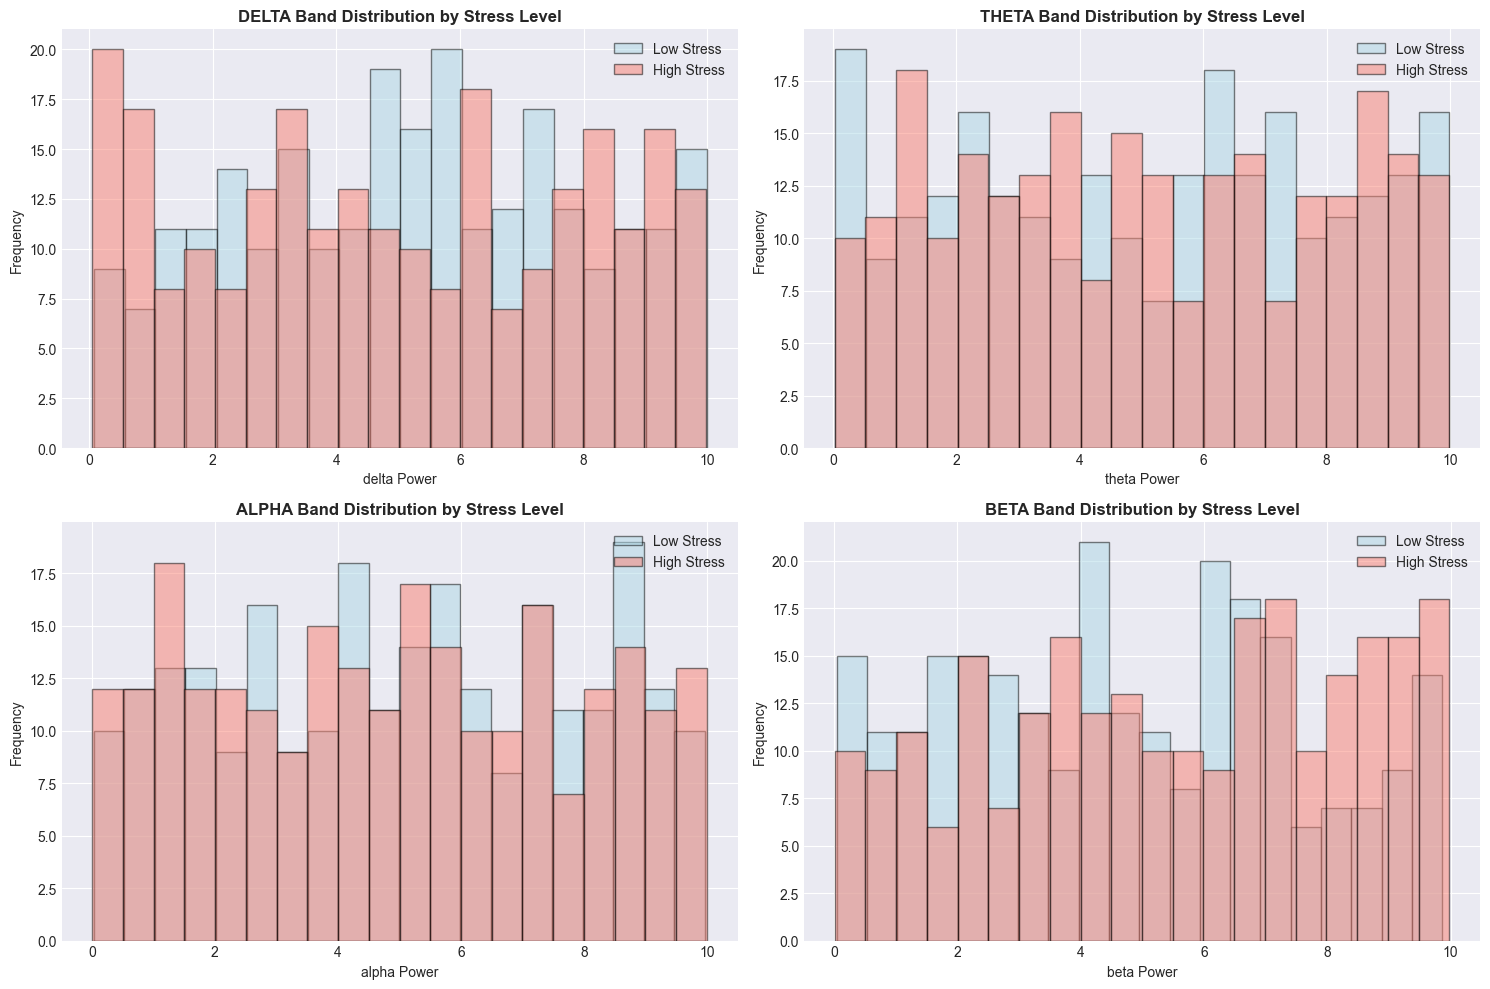


GSR ANALYSIS
Found GSR columns: ['GSR_Values']
Created GSR temporal features


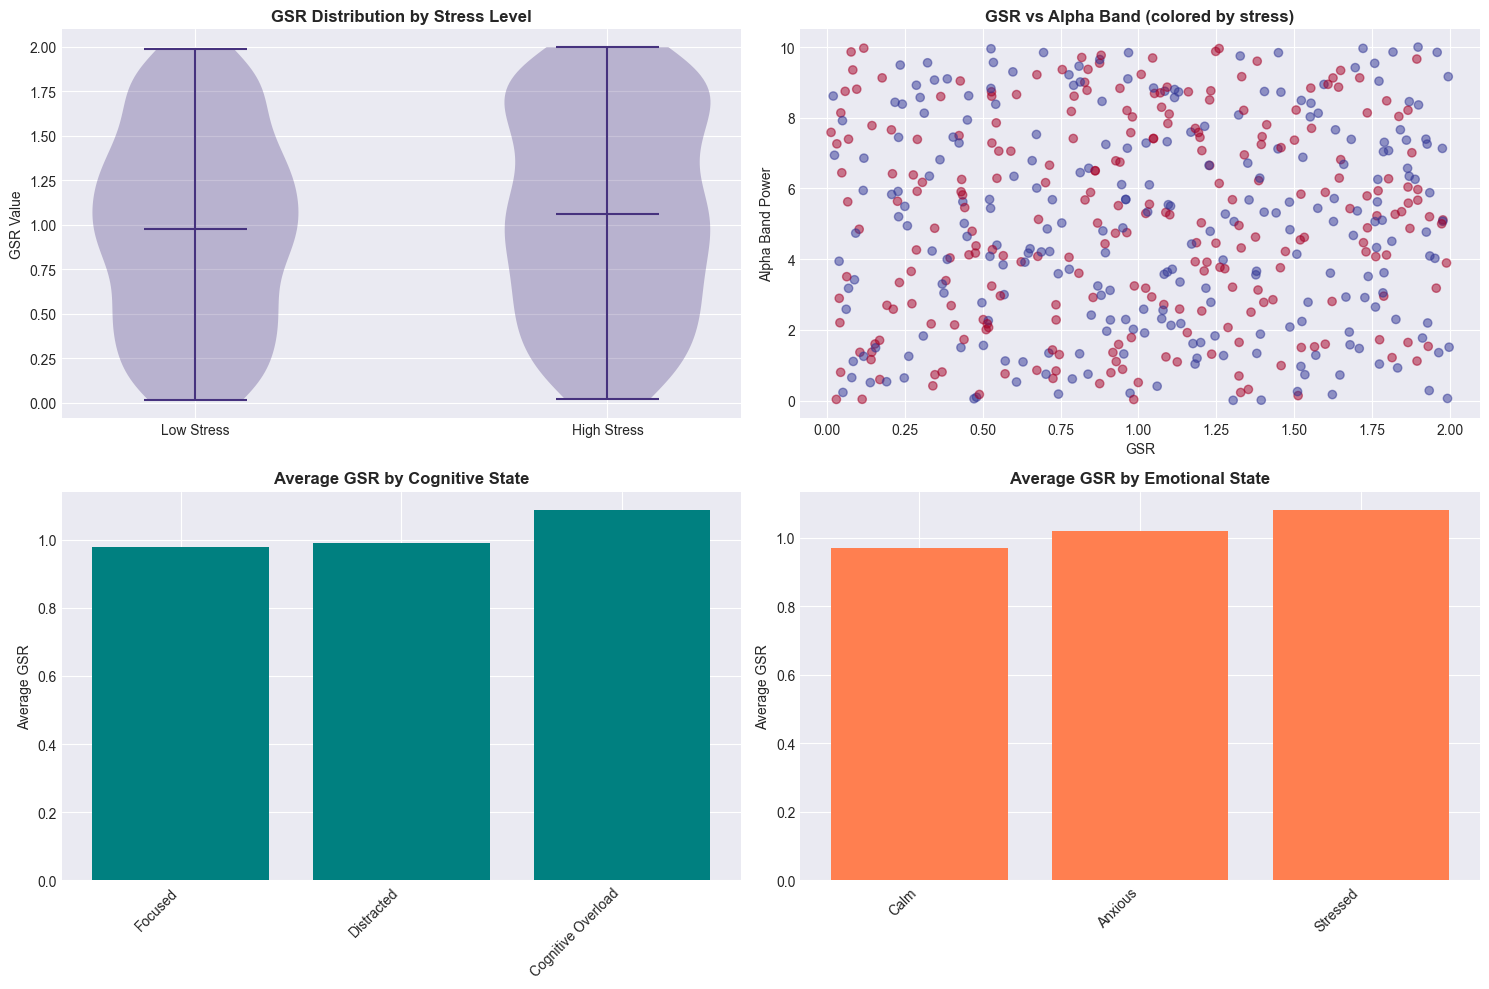


COGNITIVE AND EMOTIONAL STATE ANALYSIS


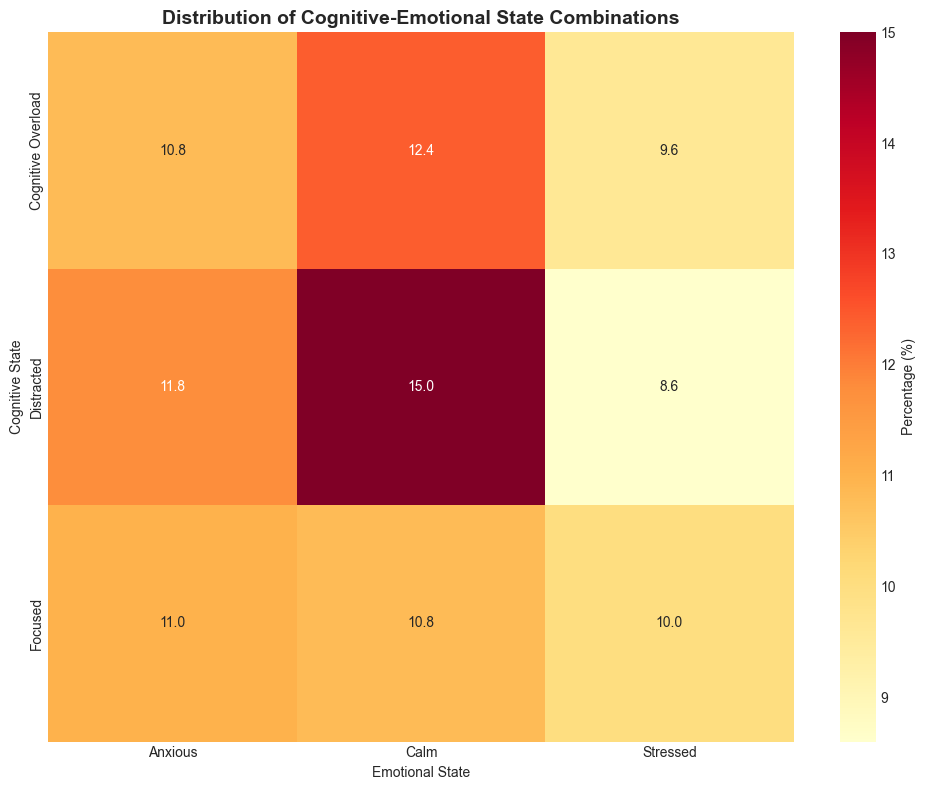


Stress Prevalence by State Combinations:
                                        mean  count
Cognitive_State    Emotional_State                 
Cognitive Overload Anxious          0.611111     54
Focused            Calm             0.592593     54
Distracted         Anxious          0.525424     59
Cognitive Overload Calm             0.500000     62
Distracted         Stressed         0.488372     43
Focused            Stressed         0.480000     50
                   Anxious          0.472727     55
Cognitive Overload Stressed         0.416667     48
Distracted         Calm             0.413333     75

TARGET VARIABLE ANALYSIS


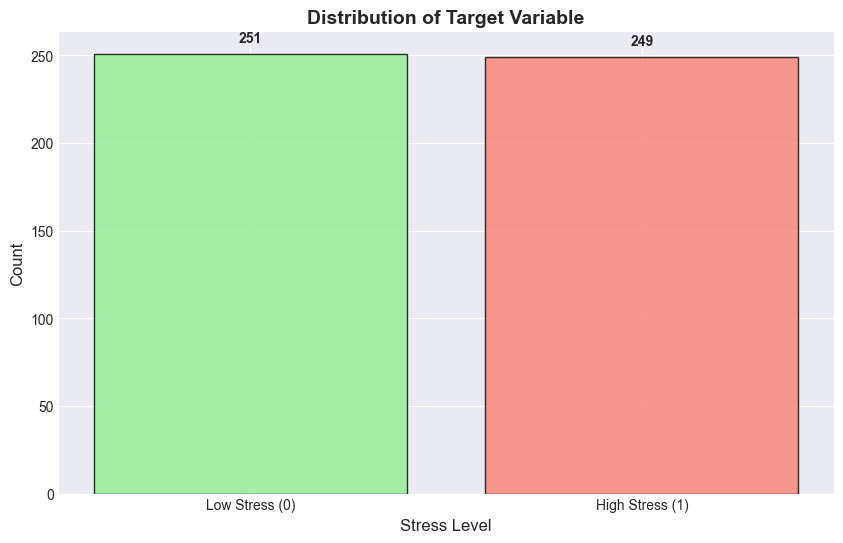


Target Distribution:
Target
0    251
1    249
Name: count, dtype: int64

Percentage Distribution:
Target
0    50.2
1    49.8
Name: count, dtype: float64

Class Imbalance Ratio: 1.01:1

SESSION CONTEXT ANALYSIS


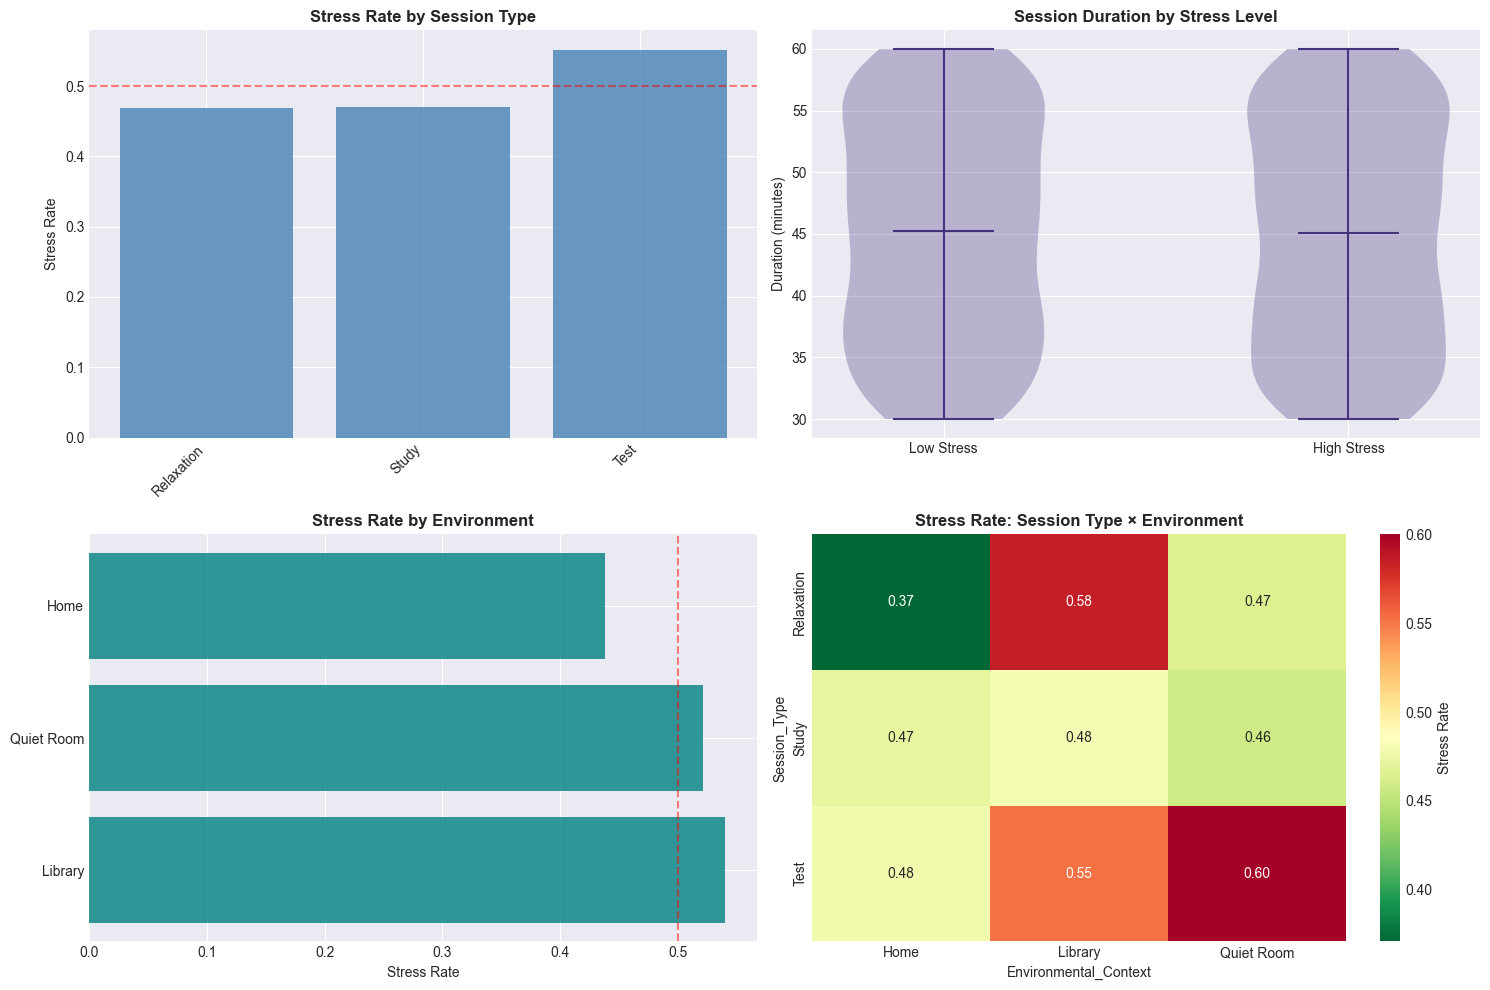


CORRELATION ANALYSIS


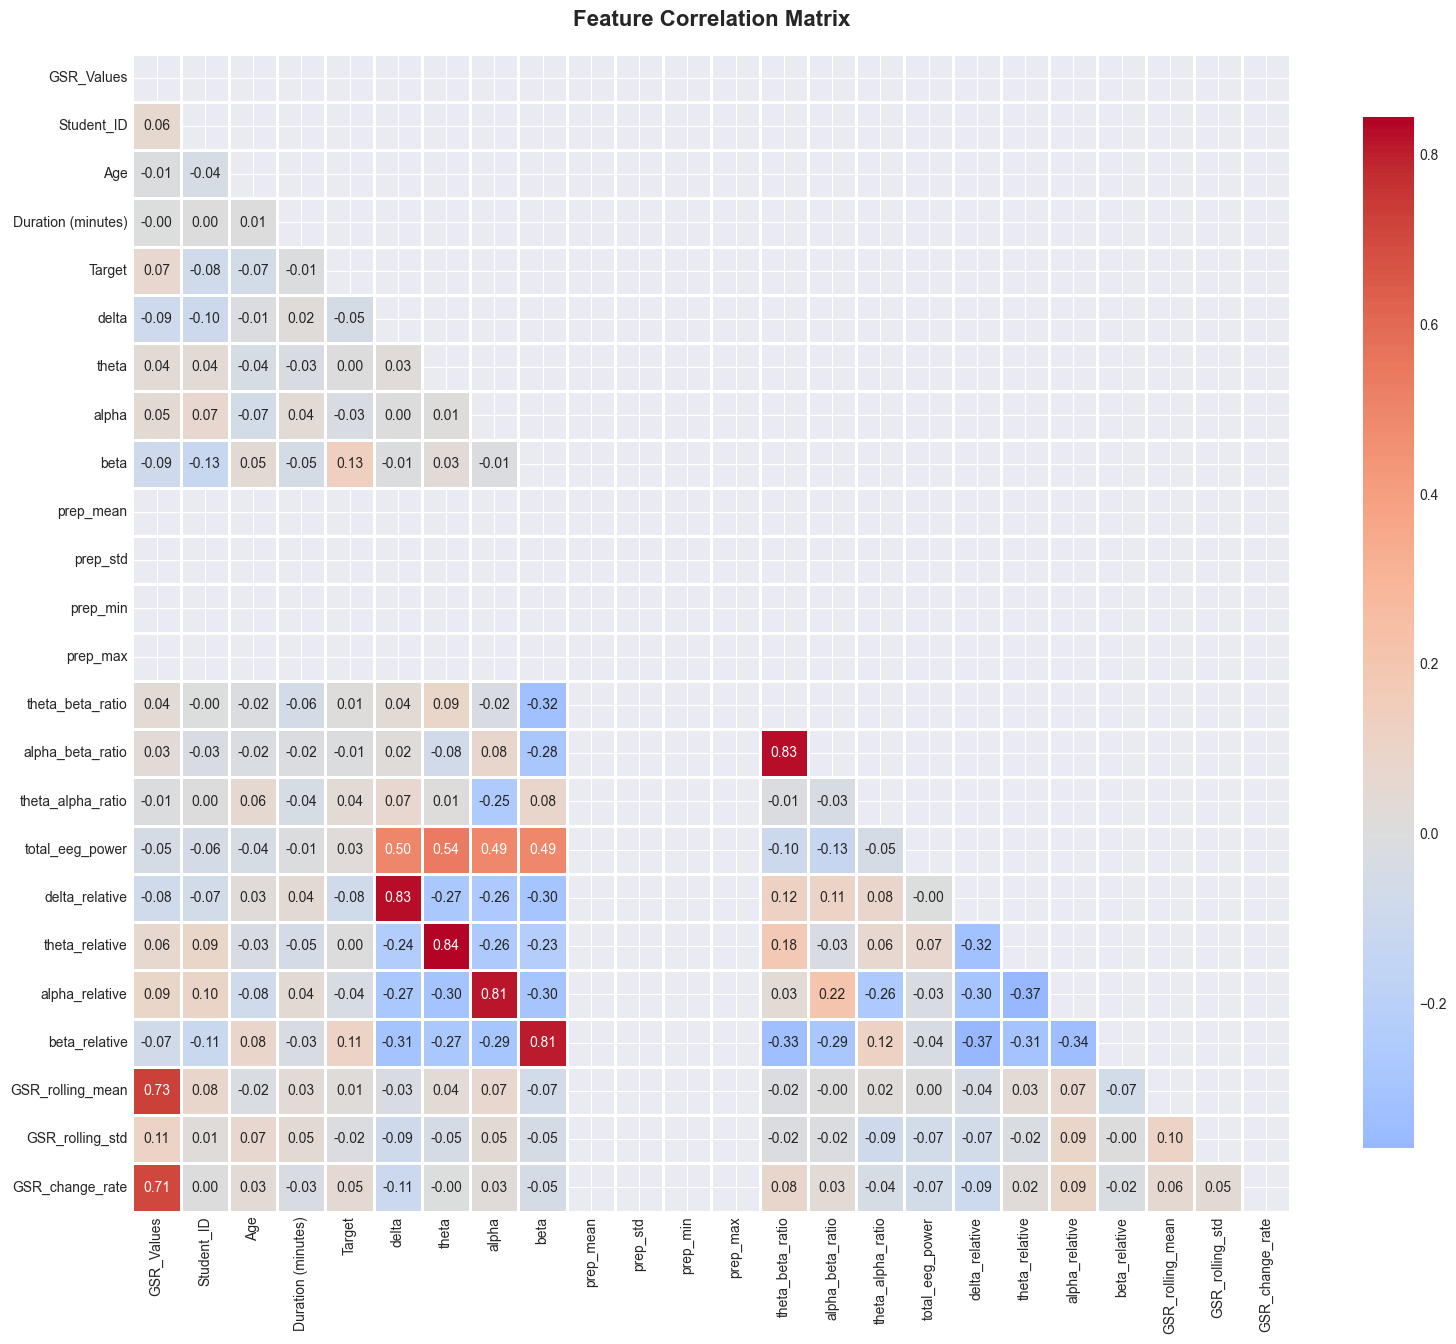


Top Features Positively Correlated with Stress:
beta                 0.133351
beta_relative        0.112337
GSR_Values           0.074513
GSR_change_rate      0.049662
theta_alpha_ratio    0.037879
total_eeg_power      0.027040
GSR_rolling_mean     0.014425
theta_beta_ratio     0.011508
theta_relative       0.002376
theta                0.001866
Name: Target, dtype: float64

Top Features Negatively Correlated with Stress:
alpha            -0.028767
alpha_relative   -0.035389
delta            -0.050623
Age              -0.066927
Student_ID       -0.078726
delta_relative   -0.081345
prep_mean              NaN
prep_std               NaN
prep_min               NaN
prep_max               NaN
Name: Target, dtype: float64


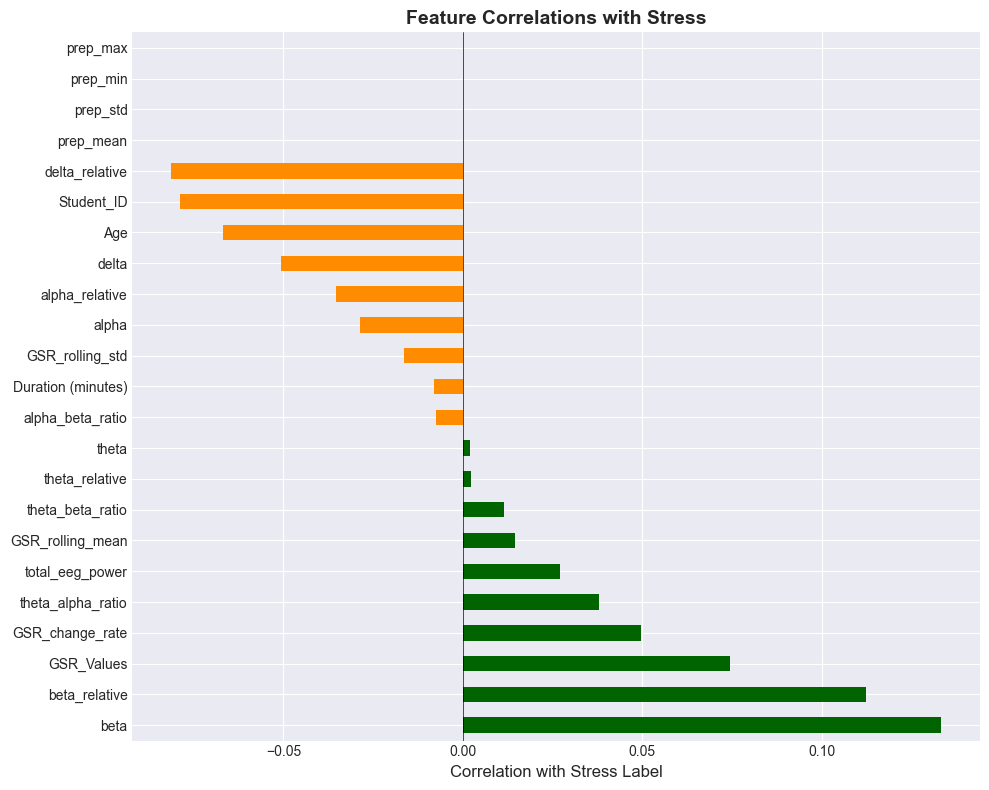


MULTIVARIATE ANALYSIS


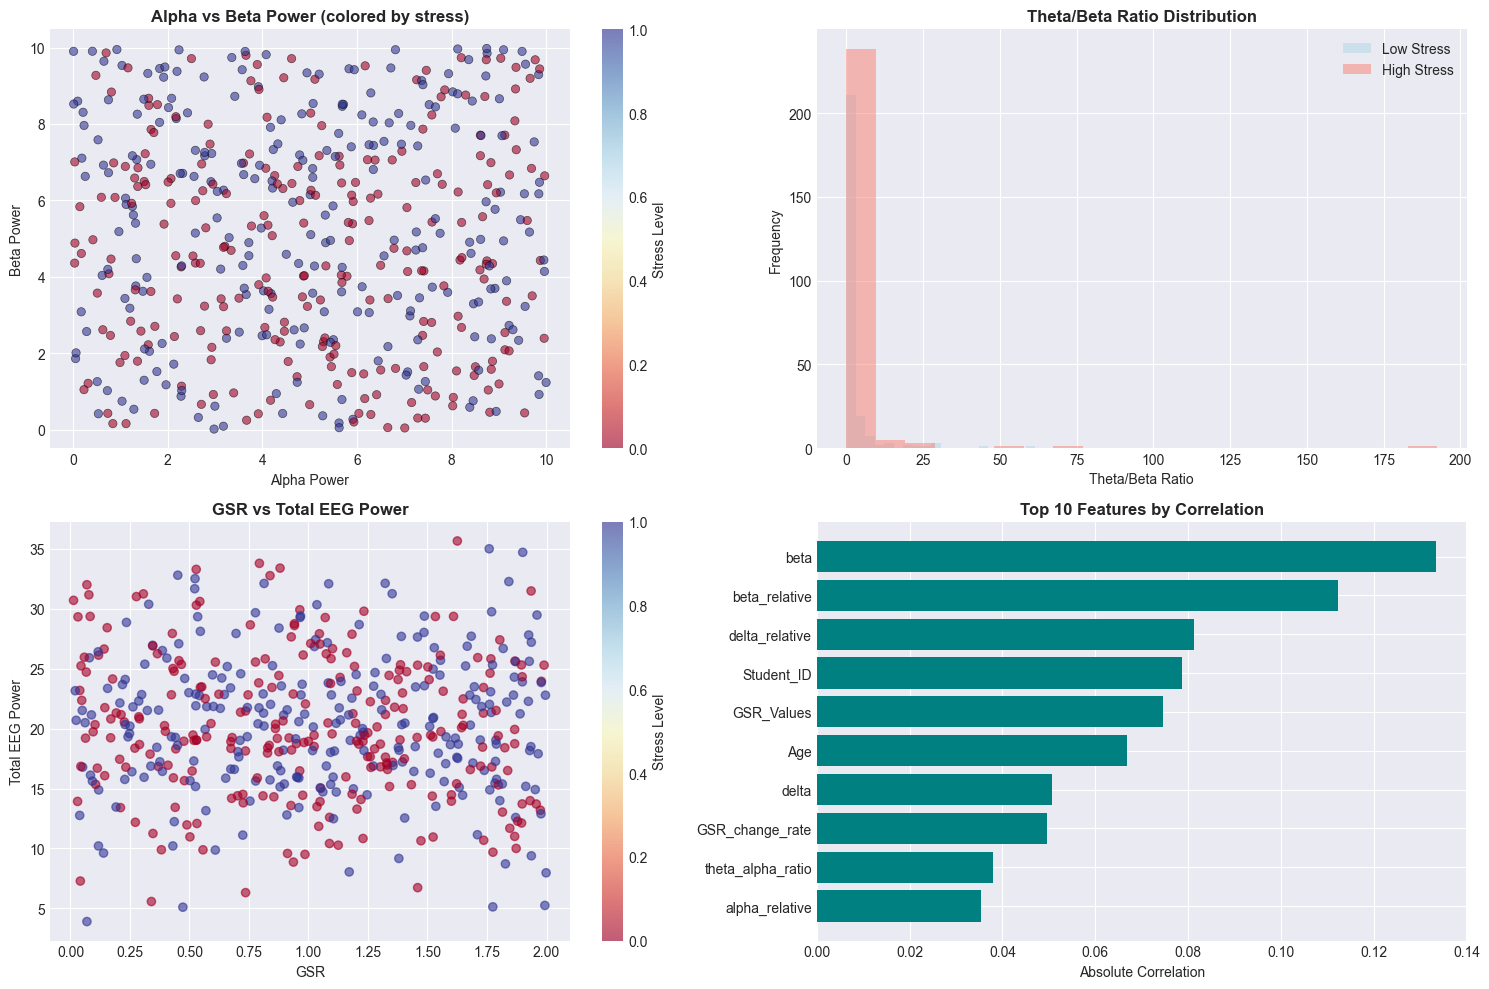


OUTLIER DETECTION

Outlier Summary (IQR Method):
                   count  percentage
alpha_beta_ratio    63.0        12.6
theta_alpha_ratio   53.0        10.6
theta_beta_ratio    52.0        10.4
beta_relative        7.0         1.4
delta_relative       4.0         0.8
theta_relative       4.0         0.8
alpha_relative       2.0         0.4
total_eeg_power      1.0         0.2


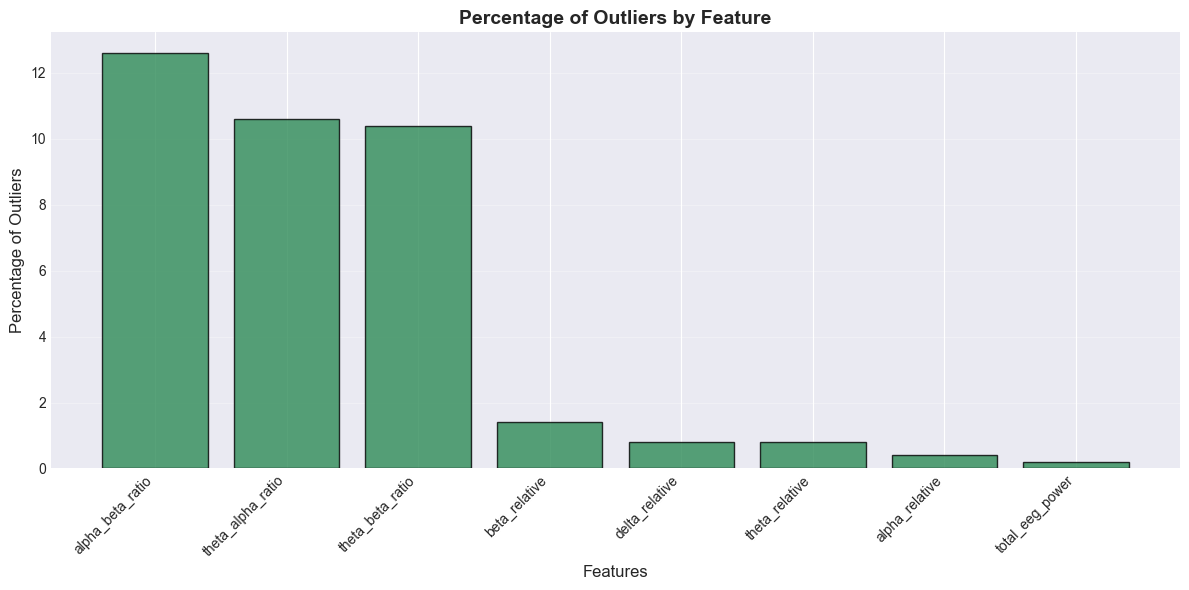


FEATURE IMPORTANCE ANALYSIS

Top 20 Features by Mutual Information:
                          Feature  MI Score
20               GSR_rolling_mean  0.043393
9                        prep_std  0.038587
1                      Student_ID  0.036051
7                            beta  0.030627
24        Emotional_State_encoded  0.029684
5                           theta  0.028909
23        Cognitive_State_encoded  0.024715
8                       prep_mean  0.023374
26  Environmental_Context_encoded  0.023284
12               theta_beta_ratio  0.021216
2                             Age  0.020120
15                total_eeg_power  0.016074
4                           delta  0.015394
3              Duration (minutes)  0.005897
27                 Gender_encoded  0.004541
10                       prep_min  0.002831
18                 alpha_relative  0.001647
14              theta_alpha_ratio  0.000864
11                       prep_max  0.000051
0                      GSR_Values  0.000000


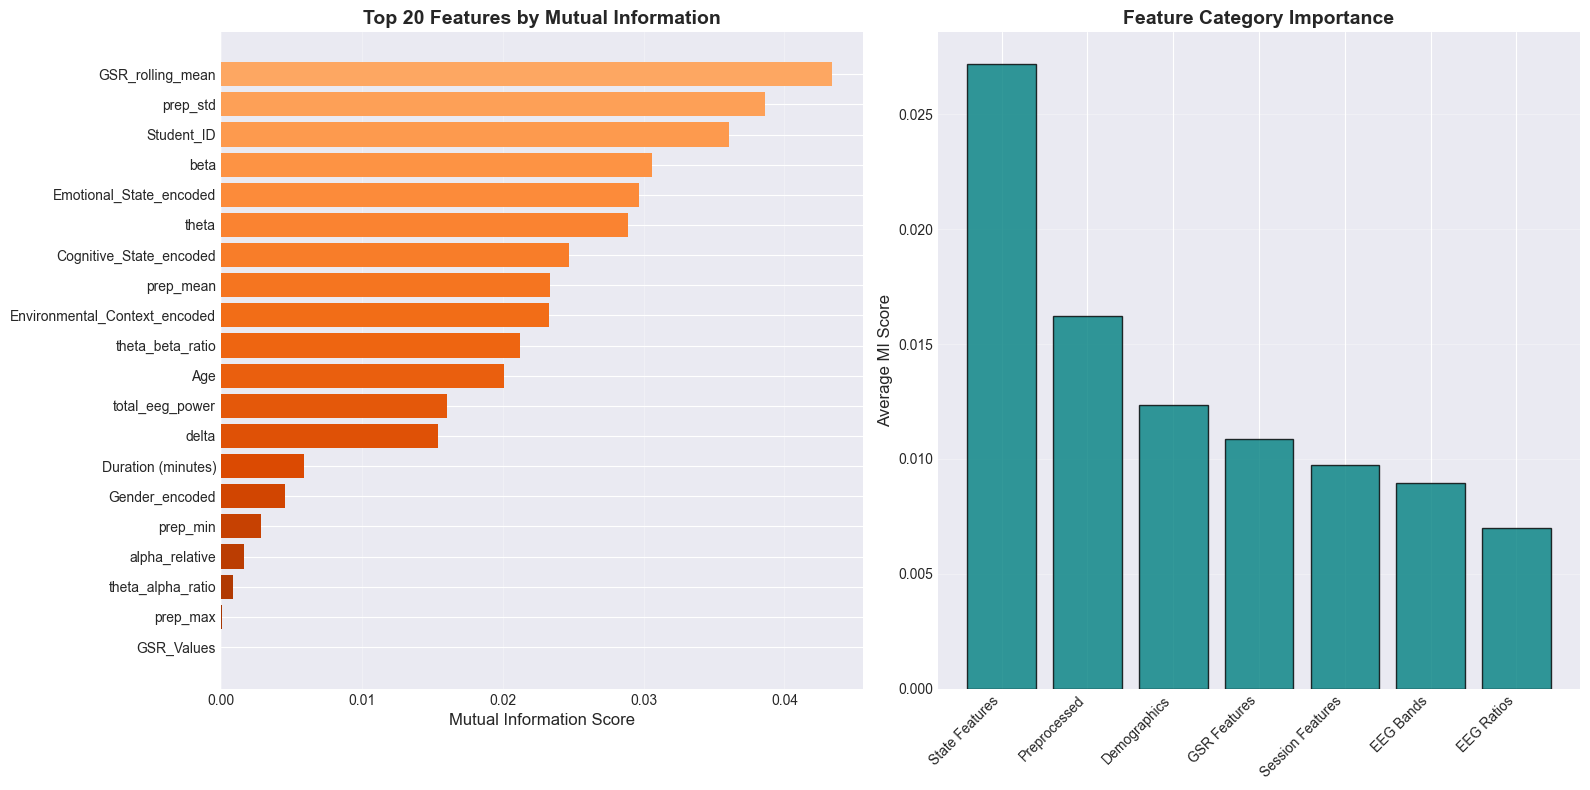


DIMENSIONALITY REDUCTION (PCA)


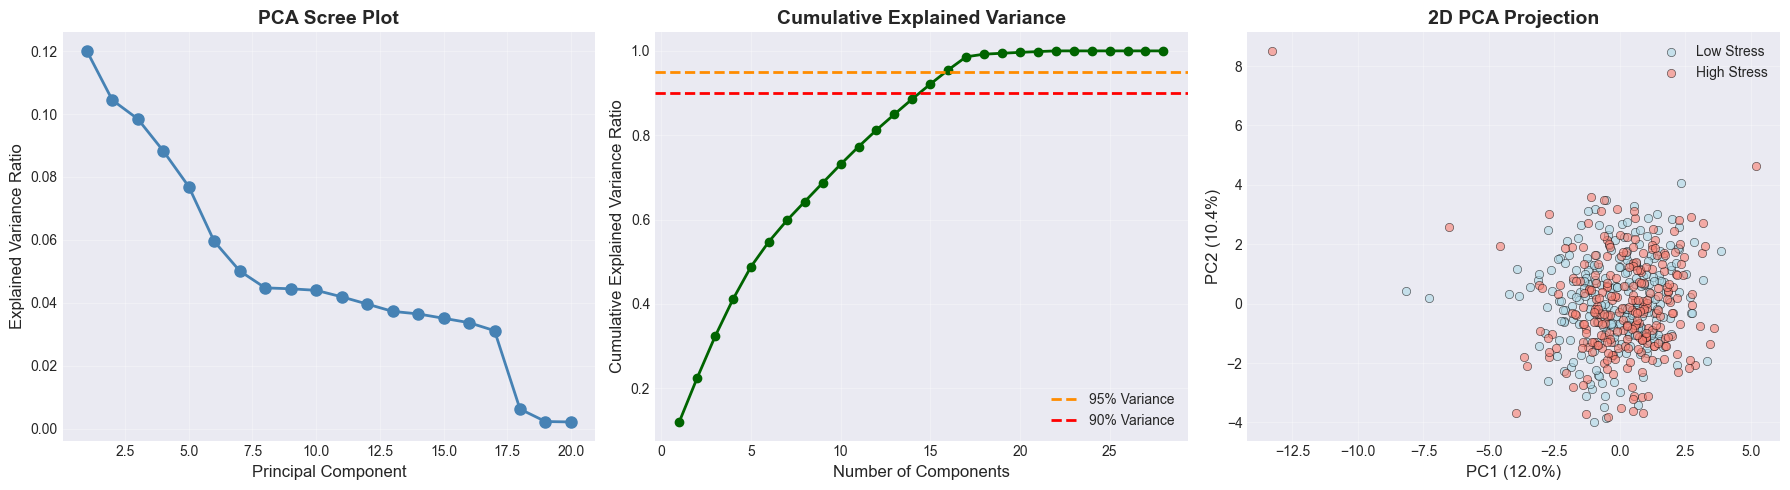


Number of components for 90% variance: 15
Number of components for 95% variance: 16

STATISTICAL TESTS

Normality Tests (Shapiro-Wilk):
alpha: p-value = 0.0000 (Non-normal)
beta: p-value = 0.0000 (Non-normal)
theta: p-value = 0.0000 (Non-normal)
delta: p-value = 0.0000 (Non-normal)
GSR_Values: p-value = 0.0000 (Non-normal)

T-tests (Low Stress vs High Stress):
beta: t=-3.003, p=0.0028 ***
beta_relative: t=-2.523, p=0.0120 ***

Chi-Square Tests (Categorical Features vs Stress):
Cognitive_State: χ²=0.930, p=0.6280 
Emotional_State: χ²=1.754, p=0.4159 
Session_Type: χ²=3.082, p=0.2141 
Environmental_Context: χ²=4.065, p=0.1310 
Gender: χ²=0.130, p=0.7188 

ADVANCED PREPROCESSING RECOMMENDATIONS FOR ML

1. DOMAIN-SPECIFIC FEATURE ENGINEERING:
   ✓ EEG band ratios created (theta/beta, alpha/beta, theta/alpha)
   ✓ Relative band powers calculated
   ✓ GSR temporal features (rolling statistics, change rate)
   - Consider: Spectral entropy, coherence between bands
   - Consider: Heart rate va

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from scipy import stats
from scipy.signal import welch
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
df = pd.read_csv('data/mental_health_wearable_data.csv')

print("=" * 80)
print("MENTAL HEALTH MONITOR USING WEARABLE IOT SENSORS")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display data types
print("\nData Types:")
print(df.dtypes)

# Important notice
print("\n" + "="*80)
print("IMPORTANT: This analysis will attempt to identify columns based on patterns.")
print("Check the 'Identified Column Mapping' section below to verify correct mapping.")
print("="*80)

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Identify feature categories based on dataset description
# First, let's check actual column names and map them appropriately
actual_columns = df.columns.tolist()
print("\nActual columns in dataset:")
print(actual_columns)

# Try to identify columns based on patterns
# Map expected names to actual names
column_mapping = {}

# Check for target column
if 'Target' in actual_columns:
    target_col = 'Target'
elif 'Stress Label' in actual_columns:
    target_col = 'Stress Label'
else:
    # Try to find a column that might be the target
    potential_targets = [col for col in actual_columns if 'target' in col.lower() or 'stress' in col.lower()]
    target_col = potential_targets[0] if potential_targets else None

# Map categorical columns
categorical_mapping = {
    'Cognitive_State': 'Cognitive State',
    'Emotional_State': 'Emotional State',
    'Session_Type': 'Session Type',
    'Environmental_Context': 'Environment'
}

categorical_cols = []
for actual, expected in categorical_mapping.items():
    if actual in actual_columns:
        categorical_cols.append(actual)
    elif expected in actual_columns:
        categorical_cols.append(expected)

# Add Gender if it exists
if 'Gender' in actual_columns:
    categorical_cols.append('Gender')

# Map other columns
eeg_bands = []
for band in ['delta', 'theta', 'alpha', 'beta']:
    # Check for exact match or case variations
    matching_cols = [col for col in actual_columns if band.lower() in col.lower()]
    if matching_cols:
        eeg_bands.extend(matching_cols)

# GSR columns
physiological_features = []
gsr_cols = [col for col in actual_columns if 'GSR' in col.upper()]
physiological_features.extend(gsr_cols)

# Demographic columns
demographic_cols = []
if 'Student_ID' in actual_columns:
    demographic_cols.append('Student_ID')
elif 'ID' in actual_columns:
    demographic_cols.append('ID')
if 'Age' in actual_columns:
    demographic_cols.append('Age')

print("\nIdentified Column Mapping:")
print(f"Target Column: {target_col}")
print(f"EEG Bands: {eeg_bands}")
print(f"Physiological: {physiological_features}")
print(f"Categorical: {categorical_cols}")
print(f"Demographics: {demographic_cols}")

# Basic statistics for numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['ID']]
print("\nBasic Statistics (Numerical Features):")
print(df[numerical_cols].describe())

# =============================================================================
# 3. HANDLING SPECIAL COLUMNS AND EXTRACTING FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("PROCESSING SPECIAL COLUMNS")
print("=" * 80)

# Check if we have EEG_Frequency_Bands column that contains multiple values
if 'EEG_Frequency_Bands' in df.columns:
    print("\nFound EEG_Frequency_Bands column - extracting individual bands...")
    
    # Function to extract band values
    def extract_eeg_bands(eeg_string):
        """Extract individual EEG band values from string format"""
        try:
            # Remove brackets and split
            values = str(eeg_string).strip('[]').split(',')
            values = [float(v.strip()) for v in values]
            # Assume order is delta, theta, alpha, beta
            if len(values) >= 4:
                return pd.Series({
                    'delta': values[0],
                    'theta': values[1],
                    'alpha': values[2],
                    'beta': values[3]
                })
            else:
                return pd.Series({'delta': np.nan, 'theta': np.nan, 'alpha': np.nan, 'beta': np.nan})
        except:
            return pd.Series({'delta': np.nan, 'theta': np.nan, 'alpha': np.nan, 'beta': np.nan})
    
    # Extract bands
    eeg_extracted = df['EEG_Frequency_Bands'].apply(extract_eeg_bands)
    df = pd.concat([df, eeg_extracted], axis=1)
    print("Extracted EEG bands: delta, theta, alpha, beta")

# Check if we have Preprocessed_Features column
if 'Preprocessed_Features' in df.columns:
    print("\nFound Preprocessed_Features column - extracting statistics...")
    
    def extract_preprocessed_stats(prep_string):
        """Extract statistics from preprocessed features"""
        try:
            values = str(prep_string).strip('[]').split(',')
            values = [float(v.strip()) for v in values]
            return pd.Series({
                'prep_mean': np.mean(values),
                'prep_std': np.std(values),
                'prep_min': np.min(values),
                'prep_max': np.max(values)
            })
        except:
            return pd.Series({'prep_mean': np.nan, 'prep_std': np.nan, 'prep_min': np.nan, 'prep_max': np.nan})
    
    prep_stats = df['Preprocessed_Features'].apply(extract_preprocessed_stats)
    df = pd.concat([df, prep_stats], axis=1)
    print("Extracted preprocessed statistics")

# Update available EEG bands
available_eeg_bands = [band for band in ['delta', 'theta', 'alpha', 'beta'] if band in df.columns]

# =============================================================================
# 4. EEG BAND ANALYSIS AND NEUROSCIENCE-BASED FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("EEG BAND ANALYSIS")
print("=" * 80)

if len(available_eeg_bands) >= 2:
    # Common EEG ratios used in stress/mental health analysis
    if 'theta' in df.columns and 'beta' in df.columns:
        df['theta_beta_ratio'] = df['theta'] / (df['beta'] + 1e-6)  # Avoid division by zero
        print("Created theta/beta ratio - indicator of mental fatigue")
    
    if 'alpha' in df.columns and 'beta' in df.columns:
        df['alpha_beta_ratio'] = df['alpha'] / (df['beta'] + 1e-6)
        print("Created alpha/beta ratio - relaxation indicator")
    
    if 'theta' in df.columns and 'alpha' in df.columns:
        df['theta_alpha_ratio'] = df['theta'] / (df['alpha'] + 1e-6)
        print("Created theta/alpha ratio - drowsiness indicator")
    
    # Total power across bands
    df['total_eeg_power'] = df[available_eeg_bands].sum(axis=1)
    print("Created total EEG power feature")
    
    # Relative band powers
    for band in available_eeg_bands:
        df[f'{band}_relative'] = df[band] / (df['total_eeg_power'] + 1e-6)
        print(f"Created relative {band} power")

# Visualize EEG band distributions
if available_eeg_bands and target_col:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, band in enumerate(available_eeg_bands[:4]):
        # Distribution by stress level
        stress_0 = df[df[target_col] == 0][band].dropna()
        stress_1 = df[df[target_col] == 1][band].dropna()
        
        axes[idx].hist(stress_0, bins=20, alpha=0.5, label='Low Stress', color='lightblue', edgecolor='black')
        axes[idx].hist(stress_1, bins=20, alpha=0.5, label='High Stress', color='salmon', edgecolor='black')
        axes[idx].set_title(f'{band.upper()} Band Distribution by Stress Level', fontweight='bold')
        axes[idx].set_xlabel(f'{band} Power')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.savefig('eeg_band_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
elif available_eeg_bands:
    # Show general EEG band distributions if no target variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, band in enumerate(available_eeg_bands[:4]):
        axes[idx].hist(df[band].dropna(), bins=20, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].set_title(f'{band.upper()} Band Distribution', fontweight='bold')
        axes[idx].set_xlabel(f'{band} Power')
        axes[idx].set_ylabel('Frequency')
        
        # Add statistics
        mean_val = df[band].mean()
        median_val = df[band].median()
        axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.savefig('eeg_band_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 5. GSR (GALVANIC SKIN RESPONSE) ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("GSR ANALYSIS")
print("=" * 80)

# Find GSR columns
gsr_columns = [col for col in df.columns if 'GSR' in col.upper()]
print(f"Found GSR columns: {gsr_columns}")

# GSR feature engineering
if gsr_columns:
    primary_gsr = gsr_columns[0]  # Use first GSR column as primary
    
    # Calculate GSR statistics per session/student
    if any(col in df.columns for col in ['Student_ID', 'ID']):
        id_col = 'Student_ID' if 'Student_ID' in df.columns else 'ID'
        # Rolling statistics for GSR (simulating temporal features)
        df['GSR_rolling_mean'] = df.groupby(id_col)[primary_gsr].transform(lambda x: x.rolling(3, min_periods=1).mean())
        df['GSR_rolling_std'] = df.groupby(id_col)[primary_gsr].transform(lambda x: x.rolling(3, min_periods=1).std())
        df['GSR_change_rate'] = df.groupby(id_col)[primary_gsr].diff()
        print("Created GSR temporal features")
    
    # Visualize GSR patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # GSR distribution by stress level
    if target_col:
        axes[0, 0].violinplot([df[df[target_col] == 0][primary_gsr].dropna(), 
                              df[df[target_col] == 1][primary_gsr].dropna()], 
                             positions=[0, 1], showmeans=True)
        axes[0, 0].set_xticks([0, 1])
        axes[0, 0].set_xticklabels(['Low Stress', 'High Stress'])
        axes[0, 0].set_title('GSR Distribution by Stress Level', fontweight='bold')
        axes[0, 0].set_ylabel('GSR Value')
    
    # GSR vs EEG correlations
    if 'alpha' in df.columns and target_col:
        axes[0, 1].scatter(df[primary_gsr], df['alpha'], alpha=0.5, c=df[target_col], cmap='RdYlBu')
        axes[0, 1].set_xlabel('GSR')
        axes[0, 1].set_ylabel('Alpha Band Power')
        axes[0, 1].set_title('GSR vs Alpha Band (colored by stress)', fontweight='bold')
    
    # GSR by cognitive state
    cog_state_col = next((col for col in df.columns if 'cognitive' in col.lower()), None)
    if cog_state_col:
        cognitive_gsr = df.groupby(cog_state_col)[primary_gsr].mean().sort_values()
        axes[1, 0].bar(range(len(cognitive_gsr)), cognitive_gsr.values, color='teal')
        axes[1, 0].set_xticks(range(len(cognitive_gsr)))
        axes[1, 0].set_xticklabels(cognitive_gsr.index, rotation=45, ha='right')
        axes[1, 0].set_title('Average GSR by Cognitive State', fontweight='bold')
        axes[1, 0].set_ylabel('Average GSR')
    
    # GSR by emotional state
    emo_state_col = next((col for col in df.columns if 'emotional' in col.lower()), None)
    if emo_state_col:
        emotional_gsr = df.groupby(emo_state_col)[primary_gsr].mean().sort_values()
        axes[1, 1].bar(range(len(emotional_gsr)), emotional_gsr.values, color='coral')
        axes[1, 1].set_xticks(range(len(emotional_gsr)))
        axes[1, 1].set_xticklabels(emotional_gsr.index, rotation=45, ha='right')
        axes[1, 1].set_title('Average GSR by Emotional State', fontweight='bold')
        axes[1, 1].set_ylabel('Average GSR')
    
    plt.tight_layout()
    plt.savefig('gsr_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 6. COGNITIVE AND EMOTIONAL STATE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("COGNITIVE AND EMOTIONAL STATE ANALYSIS")
print("=" * 80)

# Find cognitive and emotional state columns
cog_state_col = next((col for col in df.columns if 'cognitive' in col.lower()), None)
emo_state_col = next((col for col in df.columns if 'emotional' in col.lower()), None)

# Cross-tabulation of cognitive and emotional states
if cog_state_col and emo_state_col:
    # Create a heatmap of state combinations
    state_crosstab = pd.crosstab(df[cog_state_col], df[emo_state_col], normalize='all') * 100
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(state_crosstab, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Percentage (%)'})
    plt.title('Distribution of Cognitive-Emotional State Combinations', fontsize=14, fontweight='bold')
    plt.xlabel('Emotional State')
    plt.ylabel('Cognitive State')
    plt.tight_layout()
    plt.savefig('state_combinations_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Stress prevalence by state combinations
    if target_col:
        stress_by_states = df.groupby([cog_state_col, emo_state_col])[target_col].agg(['mean', 'count'])
        stress_by_states = stress_by_states.sort_values('mean', ascending=False)
        print("\nStress Prevalence by State Combinations:")
        print(stress_by_states.head(10))

# =============================================================================
# 7. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

if target_col and target_col in df.columns:
    # Stress distribution
    plt.figure(figsize=(10, 6))
    stress_counts = df[target_col].value_counts().sort_index()
    bars = plt.bar(stress_counts.index, stress_counts.values, 
                   color=['lightgreen', 'salmon'], edgecolor='black', alpha=0.8)
    plt.xlabel('Stress Level', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
    plt.xticks([0, 1], ['Low Stress (0)', 'High Stress (1)'])
    # Add value labels on bars
    for i, v in enumerate(stress_counts.values):
        plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
    plt.savefig('stress_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nTarget Distribution:")
    print(stress_counts)
    print(f"\nPercentage Distribution:")
    print((stress_counts / len(df) * 100).round(2))

    # Class imbalance ratio
    imbalance_ratio = stress_counts.max() / stress_counts.min()
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
else:
    print("Target column not found in dataset!")
    imbalance_ratio = 1.0
    stress_counts = pd.Series()  # Empty series for summary

# =============================================================================
# 8. SESSION CONTEXT ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("SESSION CONTEXT ANALYSIS")
print("=" * 80)

# Find session-related columns
session_type_col = next((col for col in df.columns if 'session' in col.lower() and 'type' in col.lower()), None)
duration_col = next((col for col in df.columns if 'duration' in col.lower()), None)
env_col = next((col for col in df.columns if 'environment' in col.lower() or 'context' in col.lower()), None)

# Analyze session types and their impact on stress
if session_type_col and target_col:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Stress by session type
    session_stress = df.groupby(session_type_col)[target_col].agg(['mean', 'count'])
    axes[0, 0].bar(range(len(session_stress)), session_stress['mean'], color='steelblue', alpha=0.8)
    axes[0, 0].set_xticks(range(len(session_stress)))
    axes[0, 0].set_xticklabels(session_stress.index, rotation=45, ha='right')
    axes[0, 0].set_title('Stress Rate by Session Type', fontweight='bold')
    axes[0, 0].set_ylabel('Stress Rate')
    axes[0, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
    
    # Session duration analysis
    if duration_col:
        # Duration by stress level
        axes[0, 1].violinplot([df[df[target_col] == 0][duration_col].dropna(),
                              df[df[target_col] == 1][duration_col].dropna()],
                             positions=[0, 1], showmeans=True)
        axes[0, 1].set_xticks([0, 1])
        axes[0, 1].set_xticklabels(['Low Stress', 'High Stress'])
        axes[0, 1].set_title('Session Duration by Stress Level', fontweight='bold')
        axes[0, 1].set_ylabel('Duration (minutes)')
    
    # Environment analysis
    if env_col:
        env_stress = df.groupby(env_col)[target_col].mean().sort_values(ascending=False)
        axes[1, 0].barh(range(len(env_stress)), env_stress.values, color='teal', alpha=0.8)
        axes[1, 0].set_yticks(range(len(env_stress)))
        axes[1, 0].set_yticklabels(env_stress.index)
        axes[1, 0].set_title('Stress Rate by Environment', fontweight='bold')
        axes[1, 0].set_xlabel('Stress Rate')
        axes[1, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    
    # Combined session characteristics
    if duration_col and env_col:
        pivot_data = df.pivot_table(values=target_col, index=session_type_col, 
                                   columns=env_col, aggfunc='mean')
        sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn_r', 
                   ax=axes[1, 1], cbar_kws={'label': 'Stress Rate'})
        axes[1, 1].set_title('Stress Rate: Session Type × Environment', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('session_context_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
elif session_type_col:
    print(f"Found session column ({session_type_col}) but no target variable for analysis")
else:
    print("Session context columns not found in dataset")

# =============================================================================
# 9. COMPREHENSIVE CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Prepare numerical features for correlation
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] 
                     and col not in ['ID', 'Timestamp']]

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with stress
stress_correlations = None
if target_col and target_col in correlation_matrix.columns:
    stress_correlations = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)
    print("\nTop Features Positively Correlated with Stress:")
    print(stress_correlations.head(10))
    print("\nTop Features Negatively Correlated with Stress:")
    print(stress_correlations.tail(10))
    
    # Visualize correlations with stress
    plt.figure(figsize=(10, 8))
    colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
    stress_correlations.plot(kind='barh', color=colors)
    plt.xlabel('Correlation with Stress Label', fontsize=12)
    plt.title('Feature Correlations with Stress', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 10. MULTIVARIATE ANALYSIS - FEATURE INTERACTIONS
# =============================================================================

print("\n" + "=" * 80)
print("MULTIVARIATE ANALYSIS")
print("=" * 80)

# Analyze EEG band interactions
if all(band in df.columns for band in ['alpha', 'beta']) and target_col:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Alpha vs Beta by stress
    scatter = axes[0, 0].scatter(df['alpha'], df['beta'], c=df[target_col], 
                                cmap='RdYlBu', alpha=0.6, edgecolors='black', linewidth=0.5)
    axes[0, 0].set_xlabel('Alpha Power')
    axes[0, 0].set_ylabel('Beta Power')
    axes[0, 0].set_title('Alpha vs Beta Power (colored by stress)', fontweight='bold')
    plt.colorbar(scatter, ax=axes[0, 0], label='Stress Level')
    
    # Theta/Beta ratio distribution
    if 'theta_beta_ratio' in df.columns:
        axes[0, 1].hist(df[df[target_col] == 0]['theta_beta_ratio'].dropna(), bins=20, 
                       alpha=0.5, label='Low Stress', color='lightblue')
        axes[0, 1].hist(df[df[target_col] == 1]['theta_beta_ratio'].dropna(), bins=20, 
                       alpha=0.5, label='High Stress', color='salmon')
        axes[0, 1].set_xlabel('Theta/Beta Ratio')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('Theta/Beta Ratio Distribution', fontweight='bold')
        axes[0, 1].legend()
    
    # GSR vs Total EEG Power
    if gsr_columns and 'total_eeg_power' in df.columns:
        scatter2 = axes[1, 0].scatter(df[gsr_columns[0]], df['total_eeg_power'], 
                                     c=df[target_col], cmap='RdYlBu', alpha=0.6)
        axes[1, 0].set_xlabel('GSR')
        axes[1, 0].set_ylabel('Total EEG Power')
        axes[1, 0].set_title('GSR vs Total EEG Power', fontweight='bold')
        plt.colorbar(scatter2, ax=axes[1, 0], label='Stress Level')
    
    # Feature importance preview
    if stress_correlations is not None:
        feature_importance = stress_correlations.abs().sort_values(ascending=False).head(10)
        axes[1, 1].barh(range(len(feature_importance)), feature_importance.values, color='teal')
        axes[1, 1].set_yticks(range(len(feature_importance)))
        axes[1, 1].set_yticklabels(feature_importance.index)
        axes[1, 1].set_xlabel('Absolute Correlation')
        axes[1, 1].set_title('Top 10 Features by Correlation', fontweight='bold')
        axes[1, 1].invert_yaxis()
    else:
        axes[1, 1].text(0.5, 0.5, 'Target correlations not available', 
                        ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Feature Correlations Not Available', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('multivariate_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Insufficient features for multivariate analysis visualization")

# =============================================================================
# 11. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method
outlier_summary = {}
for col in numerical_features:
    if df[col].notna().sum() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0][['count', 'percentage']])

# Visualize outliers
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    plt.figure(figsize=(12, 6))
    outlier_features = outlier_df[outlier_df['count'] > 0].head(15)
    plt.bar(range(len(outlier_features)), outlier_features['percentage'], 
            color='seagreen', alpha=0.8, edgecolor='black')
    plt.xticks(range(len(outlier_features)), outlier_features.index, rotation=45, ha='right')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Outliers', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 12. FEATURE IMPORTANCE USING MULTIPLE METHODS
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Prepare data for feature importance
# Encode categorical variables
le_dict = {}
df_encoded = df.copy()

# Update categorical_cols to only include columns that exist
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

for col in existing_categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df[col].fillna('Unknown'))
    le_dict[col] = le

# Combine all features
all_feature_cols = numerical_features + [col + '_encoded' for col in existing_categorical_cols]
all_feature_cols = [col for col in all_feature_cols if col != target_col and col in df_encoded.columns]

if target_col and 'all_feature_cols' in locals() and len(all_feature_cols) > 0:
    X = df_encoded[all_feature_cols].fillna(0)
    y = df_encoded[target_col]

    # Calculate mutual information scores
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_scores_df = pd.DataFrame({
        'Feature': all_feature_cols,
        'MI Score': mi_scores
    }).sort_values('MI Score', ascending=False)

    print("\nTop 20 Features by Mutual Information:")
    print(mi_scores_df.head(20))

    # Visualize feature importance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Mutual Information scores
    colors1 = plt.cm.Oranges(np.linspace(0.4, 0.9, 20))
    ax1.barh(range(min(20, len(mi_scores_df))), mi_scores_df['MI Score'].head(20).values, color=colors1)
    ax1.set_yticks(range(min(20, len(mi_scores_df))))
    ax1.set_yticklabels(mi_scores_df['Feature'].head(20).values)
    ax1.set_xlabel('Mutual Information Score', fontsize=12)
    ax1.set_title('Top 20 Features by Mutual Information', fontsize=14, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)

    # Feature categories importance
    feature_categories = {
        'EEG Bands': [f for f in all_feature_cols if any(band in f for band in ['delta', 'theta', 'alpha', 'beta'])],
        'EEG Ratios': [f for f in all_feature_cols if 'ratio' in f],
        'GSR Features': [f for f in all_feature_cols if 'GSR' in f.upper()],
        'Session Features': [f for f in all_feature_cols if any(s in f.lower() for s in ['session', 'duration', 'environment'])],
        'State Features': [f for f in all_feature_cols if any(s in f.lower() for s in ['cognitive', 'emotional'])],
        'Demographics': [f for f in all_feature_cols if any(s in f.lower() for s in ['age', 'gender'])],
        'Preprocessed': [f for f in all_feature_cols if 'prep_' in f]
    }

    category_importance = {}
    for cat, features in feature_categories.items():
        cat_features = [f for f in features if f in mi_scores_df['Feature'].values]
        if cat_features:
            category_importance[cat] = mi_scores_df[mi_scores_df['Feature'].isin(cat_features)]['MI Score'].mean()

    if category_importance:
        cat_df = pd.DataFrame(list(category_importance.items()), columns=['Category', 'Avg MI Score'])
        cat_df = cat_df.sort_values('Avg MI Score', ascending=False)
        
        ax2.bar(range(len(cat_df)), cat_df['Avg MI Score'], color='teal', alpha=0.8, edgecolor='black')
        ax2.set_xticks(range(len(cat_df)))
        ax2.set_xticklabels(cat_df['Category'], rotation=45, ha='right')
        ax2.set_ylabel('Average MI Score', fontsize=12)
        ax2.set_title('Feature Category Importance', fontsize=14, fontweight='bold')
        ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Cannot perform feature importance analysis - missing target variable or features")
    mi_scores_df = pd.DataFrame()

# =============================================================================
# 13. DIMENSIONALITY REDUCTION AND VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

if target_col and len(all_feature_cols) > 0:
    # Standardize features for PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Plot explained variance
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Scree plot
    ax1.plot(range(1, min(21, len(explained_variance_ratio) + 1)), 
             explained_variance_ratio[:20], 'o-', 
             color='steelblue', markersize=8, linewidth=2)
    ax1.set_xlabel('Principal Component', fontsize=12)
    ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
    ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Cumulative explained variance
    ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', 
             color='darkgreen', markersize=6, linewidth=2)
    ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
    ax2.axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='90% Variance')
    ax2.set_xlabel('Number of Components', fontsize=12)
    ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
    ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 2D PCA visualization
    colors = ['lightblue', 'salmon']
    for i in range(2):
        mask = y == i
        ax3.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i], 
                   label=f'{"Low" if i == 0 else "High"} Stress', 
                   alpha=0.6, edgecolors='black', linewidth=0.5)
    ax3.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontsize=12)
    ax3.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontsize=12)
    ax3.set_title('2D PCA Projection', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Number of components for different variance thresholds
    n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
    n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    print(f"\nNumber of components for 90% variance: {n_components_90}")
    print(f"Number of components for 95% variance: {n_components_95}")
else:
    print("Cannot perform PCA - missing data")
    n_components_90 = n_components_95 = 0

# Initialize variables for summary if not defined
if 'significant_features' not in locals():
    significant_features = []
if 'mi_scores_df' not in locals():
    mi_scores_df = pd.DataFrame()

# =============================================================================
# 14. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of key features
print("\nNormality Tests (Shapiro-Wilk):")
test_features = ['GSR', 'alpha', 'beta', 'theta', 'delta']
if gsr_columns:
    test_features.extend(gsr_columns[:1])
for feature in test_features:
    if feature in df.columns:
        data = df[feature].dropna()
        if len(data) > 3:  # Shapiro-Wilk needs at least 3 samples
            stat, p_val = stats.shapiro(data[:5000])  # Limit sample size
            print(f"{feature}: p-value = {p_val:.4f} ({'Normal' if p_val > 0.05 else 'Non-normal'})")

# T-tests for numerical features between stress groups
if target_col:
    print("\nT-tests (Low Stress vs High Stress):")
    significant_features = []
    for feature in numerical_features:
        if feature != target_col:
            group0 = df[df[target_col] == 0][feature].dropna()
            group1 = df[df[target_col] == 1][feature].dropna()
            if len(group0) > 0 and len(group1) > 0:
                t_stat, p_val = stats.ttest_ind(group0, group1)
                if p_val < 0.05:
                    significant_features.append((feature, p_val))
                    print(f"{feature}: t={t_stat:.3f}, p={p_val:.4f} ***")

    # Chi-square tests for categorical features vs stress
    print("\nChi-Square Tests (Categorical Features vs Stress):")
    # Use categorical columns that exist in the dataframe
    test_categorical_cols = [col for col in categorical_cols if col in df.columns]
    for feature in test_categorical_cols:
        contingency_table = pd.crosstab(df[feature], df[target_col])
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
            print(f"{feature}: χ²={chi2:.3f}, p={p_val:.4f} {'***' if p_val < 0.05 else ''}")
else:
    print("Cannot perform statistical tests - missing target variable")
    significant_features = []

# =============================================================================
# 15. ADVANCED PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("ADVANCED PREPROCESSING RECOMMENDATIONS FOR ML")
print("=" * 80)

print("\n1. DOMAIN-SPECIFIC FEATURE ENGINEERING:")
print("   ✓ EEG band ratios created (theta/beta, alpha/beta, theta/alpha)")
print("   ✓ Relative band powers calculated")
print("   ✓ GSR temporal features (rolling statistics, change rate)")
print("   - Consider: Spectral entropy, coherence between bands")
print("   - Consider: Heart rate variability if available")
print("   - Consider: Circadian rhythm features from timestamps")

print("\n2. SIGNAL PROCESSING:")
print("   - Apply bandpass filters to EEG signals (0.5-50 Hz)")
print("   - Remove artifacts using ICA (already mentioned in dataset)")
print("   - Normalize EEG bands by total power")
print("   - Apply wavelet decomposition for time-frequency features")

print("\n3. HANDLING PHYSIOLOGICAL VARIABILITY:")
print("   - Z-score normalization within subjects")
print("   - Baseline correction using rest periods")
print("   - Consider person-specific models or mixed-effects approaches")

print("\n4. TEMPORAL MODELING:")
print("   - Use sliding windows for feature extraction")
print("   - Consider LSTM/GRU for sequential patterns")
print("   - Extract trend and seasonality components")

print("\n5. CLASS IMBALANCE HANDLING:")
if imbalance_ratio > 1.5:
    print(f"   - Imbalance ratio: {imbalance_ratio:.2f}:1")
    print("   - Use SMOTE or ADASYN for oversampling")
    print("   - Consider cost-sensitive learning")
    print("   - Use stratified k-fold cross-validation")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION STRATEGY:")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.05])} features (MI > 0.05)")
print("   - Use recursive feature elimination with CV")
print("   - Consider domain knowledge for feature groups")
print("   - Test interaction terms between EEG and GSR")

print("\n7. MODEL RECOMMENDATIONS:")
print("   - Ensemble methods: Random Forest, XGBoost (handle mixed data types)")
print("   - Neural networks: Consider 1D CNN for raw signals")
print("   - SVM with RBF kernel (after scaling)")
print("   - Logistic regression as baseline")

print("\n8. VALIDATION STRATEGY:")
print("   - Use subject-wise split (avoid data leakage)")
print("   - Time-based validation for deployment")
print("   - Cross-validation within subjects")
print("   - External validation on held-out subjects")

# =============================================================================
# 16. SAVE COMPREHENSIVE ANALYSIS SUMMARY
# =============================================================================

# Create a detailed summary report
# Get ID column name
id_col = next((col for col in df.columns if col.lower() in ['id', 'student_id']), None)

summary_report = f"""
MENTAL HEALTH WEARABLE IOT SENSORS - ANALYSIS SUMMARY
===================================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- Unique Students: {df[id_col].nunique() if id_col else 'N/A'}
- Sensors Used: EEG (4 bands), GSR

Target Variable:
- Column Name: {target_col if target_col else 'Not found'}
- Distribution: {stress_counts.to_dict() if target_col and 'stress_counts' in locals() else 'N/A'}
- Class Imbalance Ratio: {f"{imbalance_ratio:.2f}:1" if 'imbalance_ratio' in locals() else 'N/A'}

EEG Analysis:
- Available Bands: {', '.join(available_eeg_bands)}
- Band Ratios Created: {', '.join([col for col in df.columns if 'ratio' in col])}
- Relative Powers: {'Calculated' if any('relative' in col for col in df.columns) else 'Not calculated'}

GSR Analysis:
- GSR Columns Found: {', '.join(gsr_columns) if gsr_columns else 'None found'}
- Primary GSR Mean: {f"{df[gsr_columns[0]].mean():.2f} (±{df[gsr_columns[0]].std():.2f})" if gsr_columns else 'N/A'}
- Temporal Features: {'Created' if 'GSR_rolling_mean' in df.columns else 'Not created'}

Cognitive-Emotional States:
- Cognitive State Column: {cog_state_col if 'cog_state_col' in locals() and cog_state_col else 'Not found'}
- Emotional State Column: {emo_state_col if 'emo_state_col' in locals() and emo_state_col else 'Not found'}

Session Context:
- Session Type Column: {session_type_col if 'session_type_col' in locals() and session_type_col else 'Not found'}
- Duration Column: {duration_col if 'duration_col' in locals() and duration_col else 'Not found'}
- Environment Column: {env_col if 'env_col' in locals() and env_col else 'Not found'}

Feature Importance:
- Total Features Analyzed: {len(all_feature_cols) if 'all_feature_cols' in locals() else 0}
- Top Features Available: {'Yes' if 'mi_scores_df' in locals() and len(mi_scores_df) > 0 else 'No'}

Statistical Insights:
- Significant Features (p<0.05): {len(significant_features) if 'significant_features' in locals() else 0}
- PCA Components for 90% variance: {n_components_90 if 'n_components_90' in locals() else 'N/A'}
- PCA Components for 95% variance: {n_components_95 if 'n_components_95' in locals() else 'N/A'}

Key Recommendations:
1. Extract EEG bands from string format if needed
2. Create band ratio features for mental state detection
3. Handle categorical variables with appropriate encoding
4. Use subject-wise data splitting to avoid leakage
5. Consider ensemble methods for robustness
6. Apply proper signal preprocessing for EEG data
7. Handle class imbalance with appropriate techniques

Files Generated:
- eeg_band_distributions.png (if EEG bands available)
- gsr_analysis.png (if GSR data available)
- state_combinations_heatmap.png (if state columns available)
- stress_distribution.png (if target column available)
- session_context_analysis.png (if session data available)
- correlation_matrix.png
- stress_correlations.png (if target column available)
- multivariate_analysis.png (if required features available)
- outlier_percentages.png
- feature_importance_analysis.png (if target column available)
- pca_analysis.png (if target column available)
- mental_health_analysis_summary.txt

Note: Some visualizations may not be generated if required columns are not found in the dataset.
Check console output for details on which columns were identified.

Ready for advanced ML modeling with physiological signal processing!
"""

# Save summary to file
with open('mental_health_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("COMPREHENSIVE ANALYSIS COMPLETE!")
print("=" * 80)
print("\nThis analysis provides deep insights into:")
print("- EEG band patterns and their relationship with stress")
print("- GSR responses across different mental states")
print("- Cognitive-emotional state interactions")
print("- Session context effects on stress levels")
print("- Actionable preprocessing strategies for wearable sensor data")
print("\nRefer to the generated visualizations and summary file for detailed insights!")